# WeatherPy

---

## Generating Random Geographic Coordinates and a List of Cities to Collect Weather Data on for Analysis

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Importing the OpenWeatherMap API key
from api_keys import weather_api_key

# Importing citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generating the Cities List by Using the `citipy` Library

In [5]:
# List for holding latitude and longitude combinations
lat_lngs = []

# List for holding city names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Creating set of random latitude and longitude combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identifying nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Adding each unique city to the city list
    if city not in cities:
        cities.append(city)

# Printing the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 644


## Step 1: Creating Plots to Showcase the Relationship Between Weather Variables and Latitude

### Using the OpenWeatherMap API to retrieve weather data from the generated cities list

In [6]:
# Setting the API base URL
url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q='

# Creating empty list to keep the weather data for each city
city_data = []

# Printing to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Creating counters
record_count = 1
set_count = 1

# Looping through the cities in the list to collect weather data
for i, city in enumerate(cities):
        
    # Grouping cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Creating endpoint URL for each city
    city_url = url + city
    
    # Logging the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Adding 1 to the record count
    record_count += 1

    # Running API request for each of the cities
    try:
        # Parsing the JSON and retrieving data
        city_weather = requests.get(city_url).json()

        # Parsing out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # Skipping city if an error is encountered
    except:
        print("City not found. Skipping...")
        pass
              
# Printing statement to mark completion of data retrieval 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chokwe
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | nevel
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | necochea
Processing Record 7 of Set 1 | kavieng
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | tuljapur
Processing Record 10 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | port blair
Processing Record 13 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 14 of Set 1 | beringovskiy
Processing Record 15 of Set 1 | tuktoyaktuk
Processing Record 16 of Set 1 | mahebourg
Processing Record 17 of Set 1 | lebu
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | isangel
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | hasaki
Processing Record 22 of Set 1 | niko

In [7]:
# Inserting cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Displaying number of records
city_data_df.count()

City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [8]:
# Displaying a sample of the data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chokwe,-24.5333,32.9833,23.15,89,21,4.77,MZ,1675717707
1,hobart,-42.8794,147.3294,15.03,72,20,1.03,AU,1675717652
2,atuona,-9.8000,-139.0333,25.61,76,5,6.54,PF,1675717707
3,nevel,56.0209,29.9284,-1.73,98,100,2.26,RU,1675717708
4,avarua,-21.2078,-159.7750,29.03,84,97,4.12,CK,1675717708


In [10]:
# Exporiting the data into a CSV
city_data_df.to_csv("Output_Data/cities.csv", index_label="City_ID")


In [11]:
# Reading saved data from CSV
city_data_df = pd.read_csv("Output_Data/cities.csv", index_col="City_ID")

# Displaying a sample of the data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chokwe,-24.5333,32.9833,23.15,89,21,4.77,MZ,1675717707
1,hobart,-42.8794,147.3294,15.03,72,20,1.03,AU,1675717652
2,atuona,-9.8000,-139.0333,25.61,76,5,6.54,PF,1675717707
3,nevel,56.0209,29.9284,-1.73,98,100,2.26,RU,1675717708
4,avarua,-21.2078,-159.7750,29.03,84,97,4.12,CK,1675717708


### Creating the Scatter Plots with the weather parameters

#### Latitude Vs. Temperature

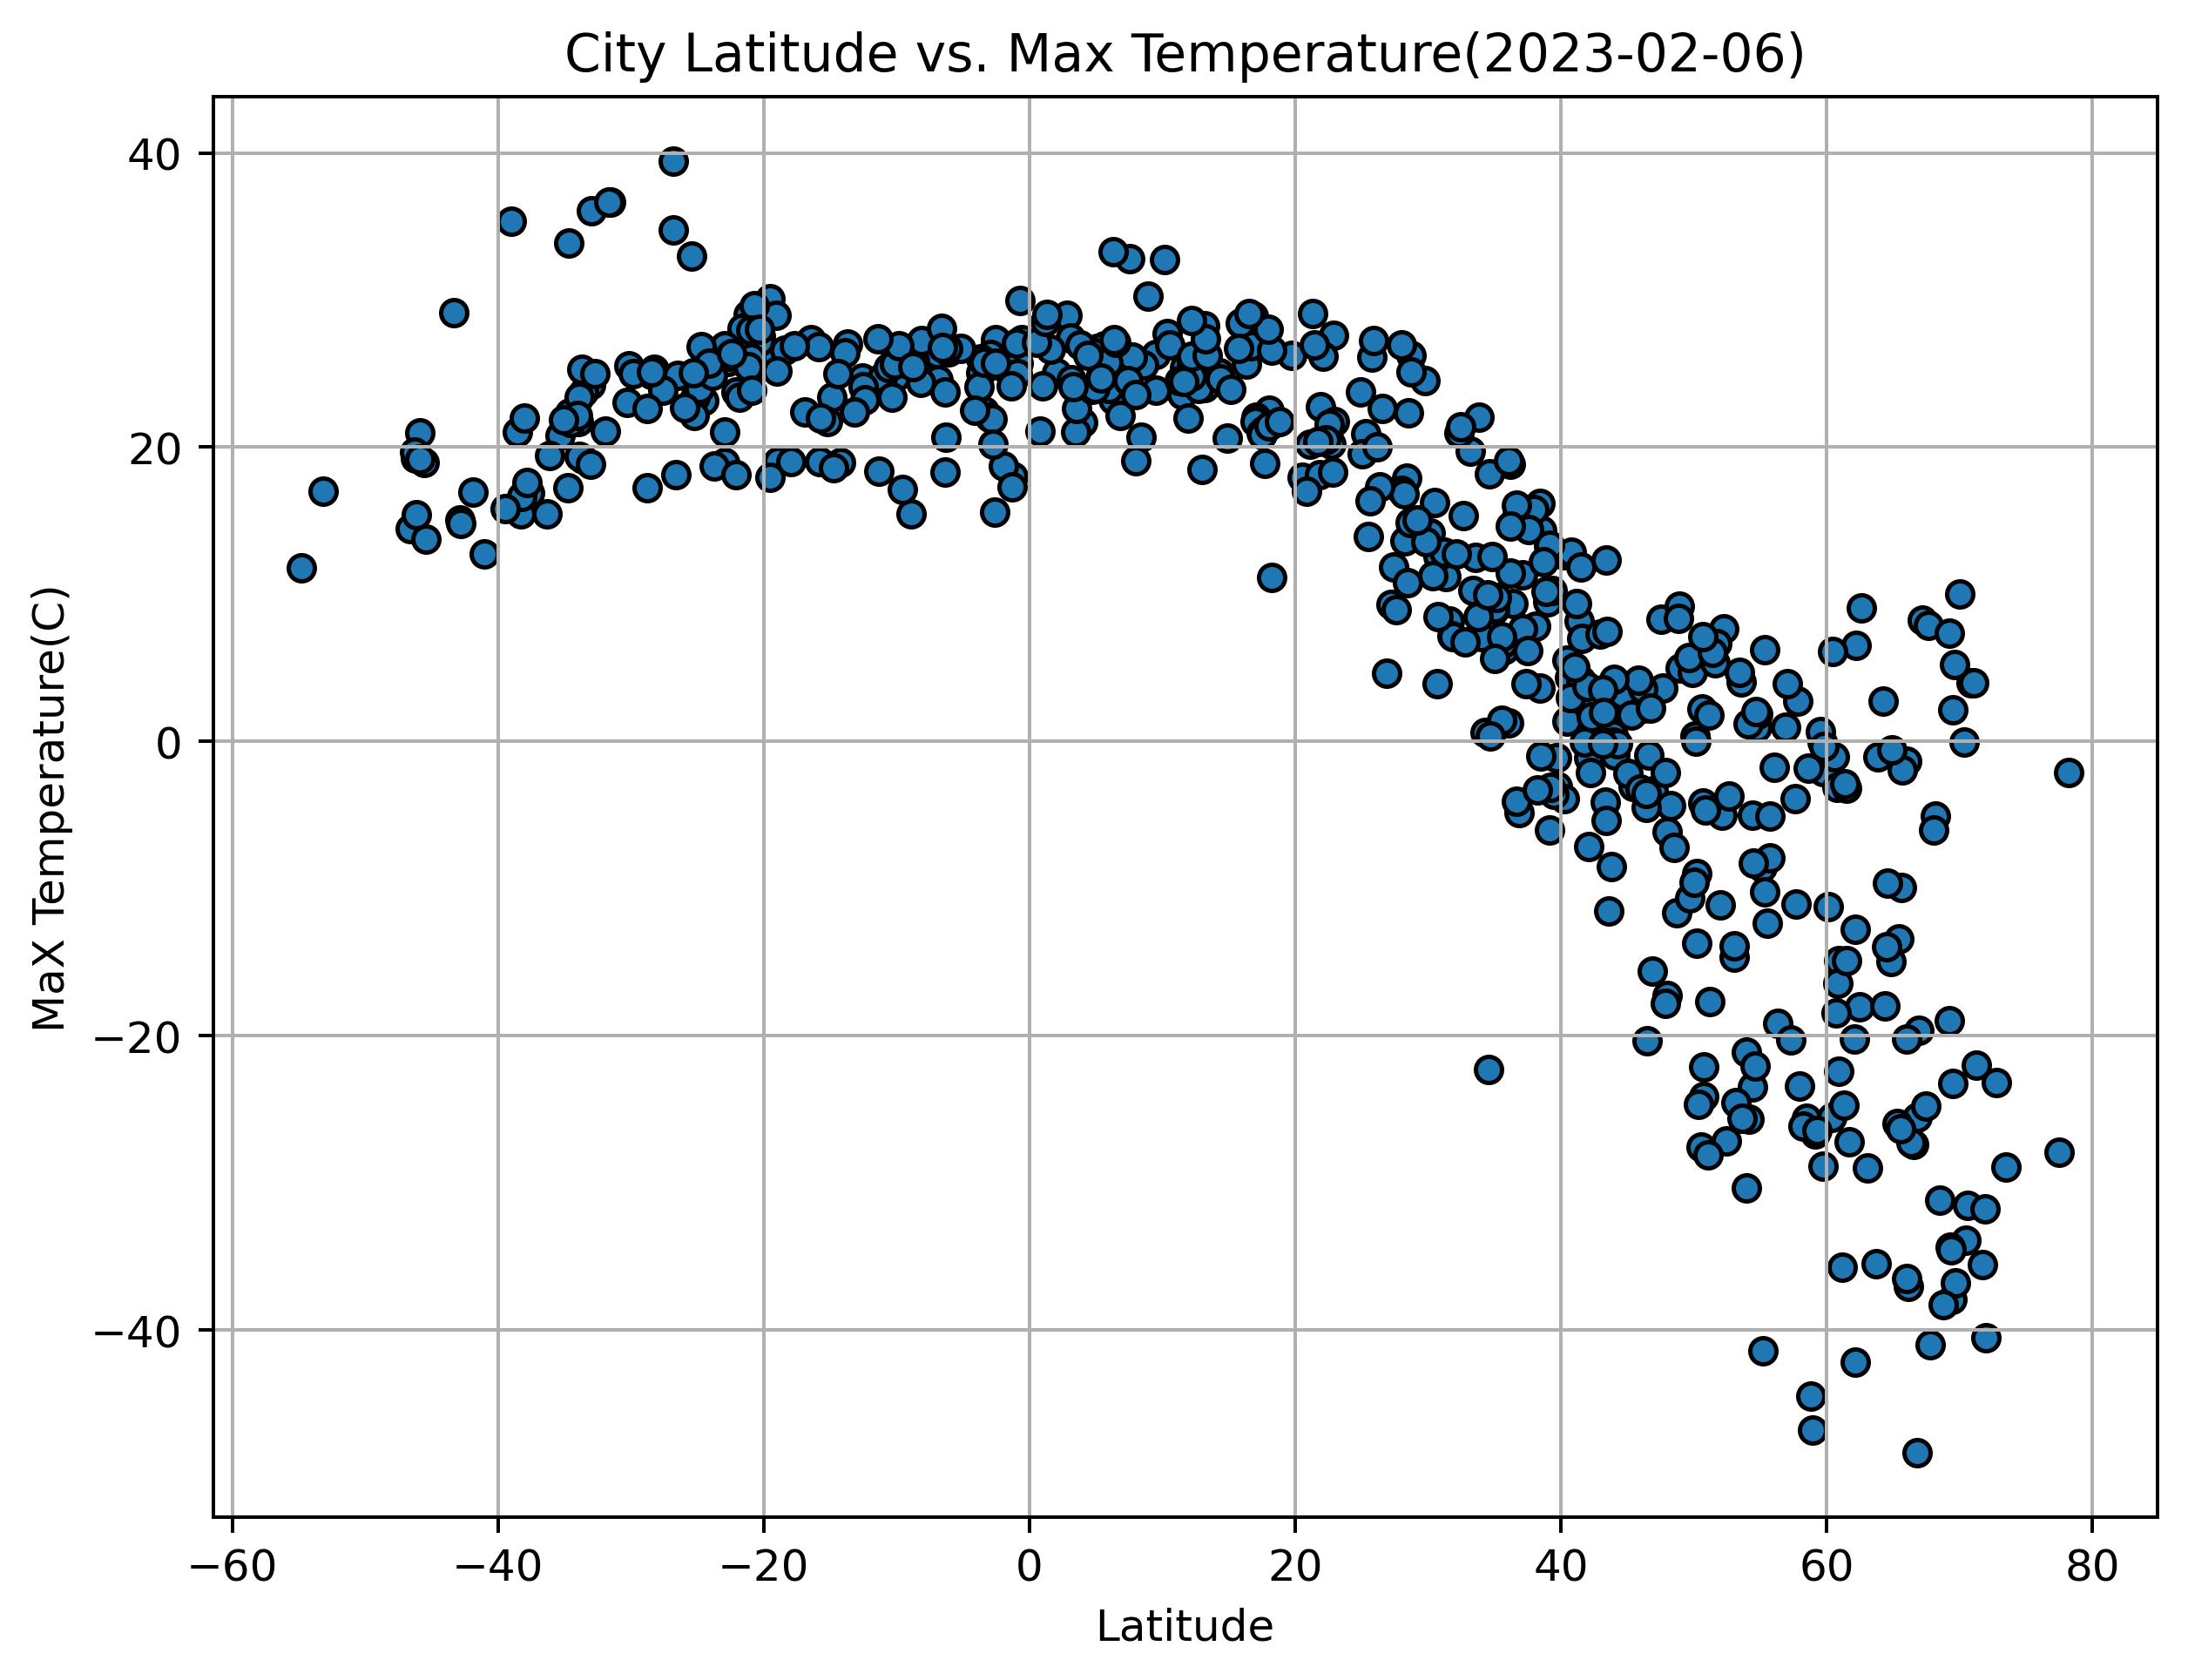

In [48]:
# Creating Scatter plot for latitude vs temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, marker='o', edgecolors='black')

# Adding graph title, axes titles and grid
plt.title('City Latitude vs. Max Temperature(2023-02-06)')
plt.xlabel('Latitude')
plt.ylabel('MaX Temperature(C)')
plt.grid()

# Increasing resolution of figure and saving image
plt.rcParams["figure.dpi"] = 360
plt.savefig('Output_Data/Figure1.png')

# Displaying plot
plt.show()

#### Latitude Vs. Humidity

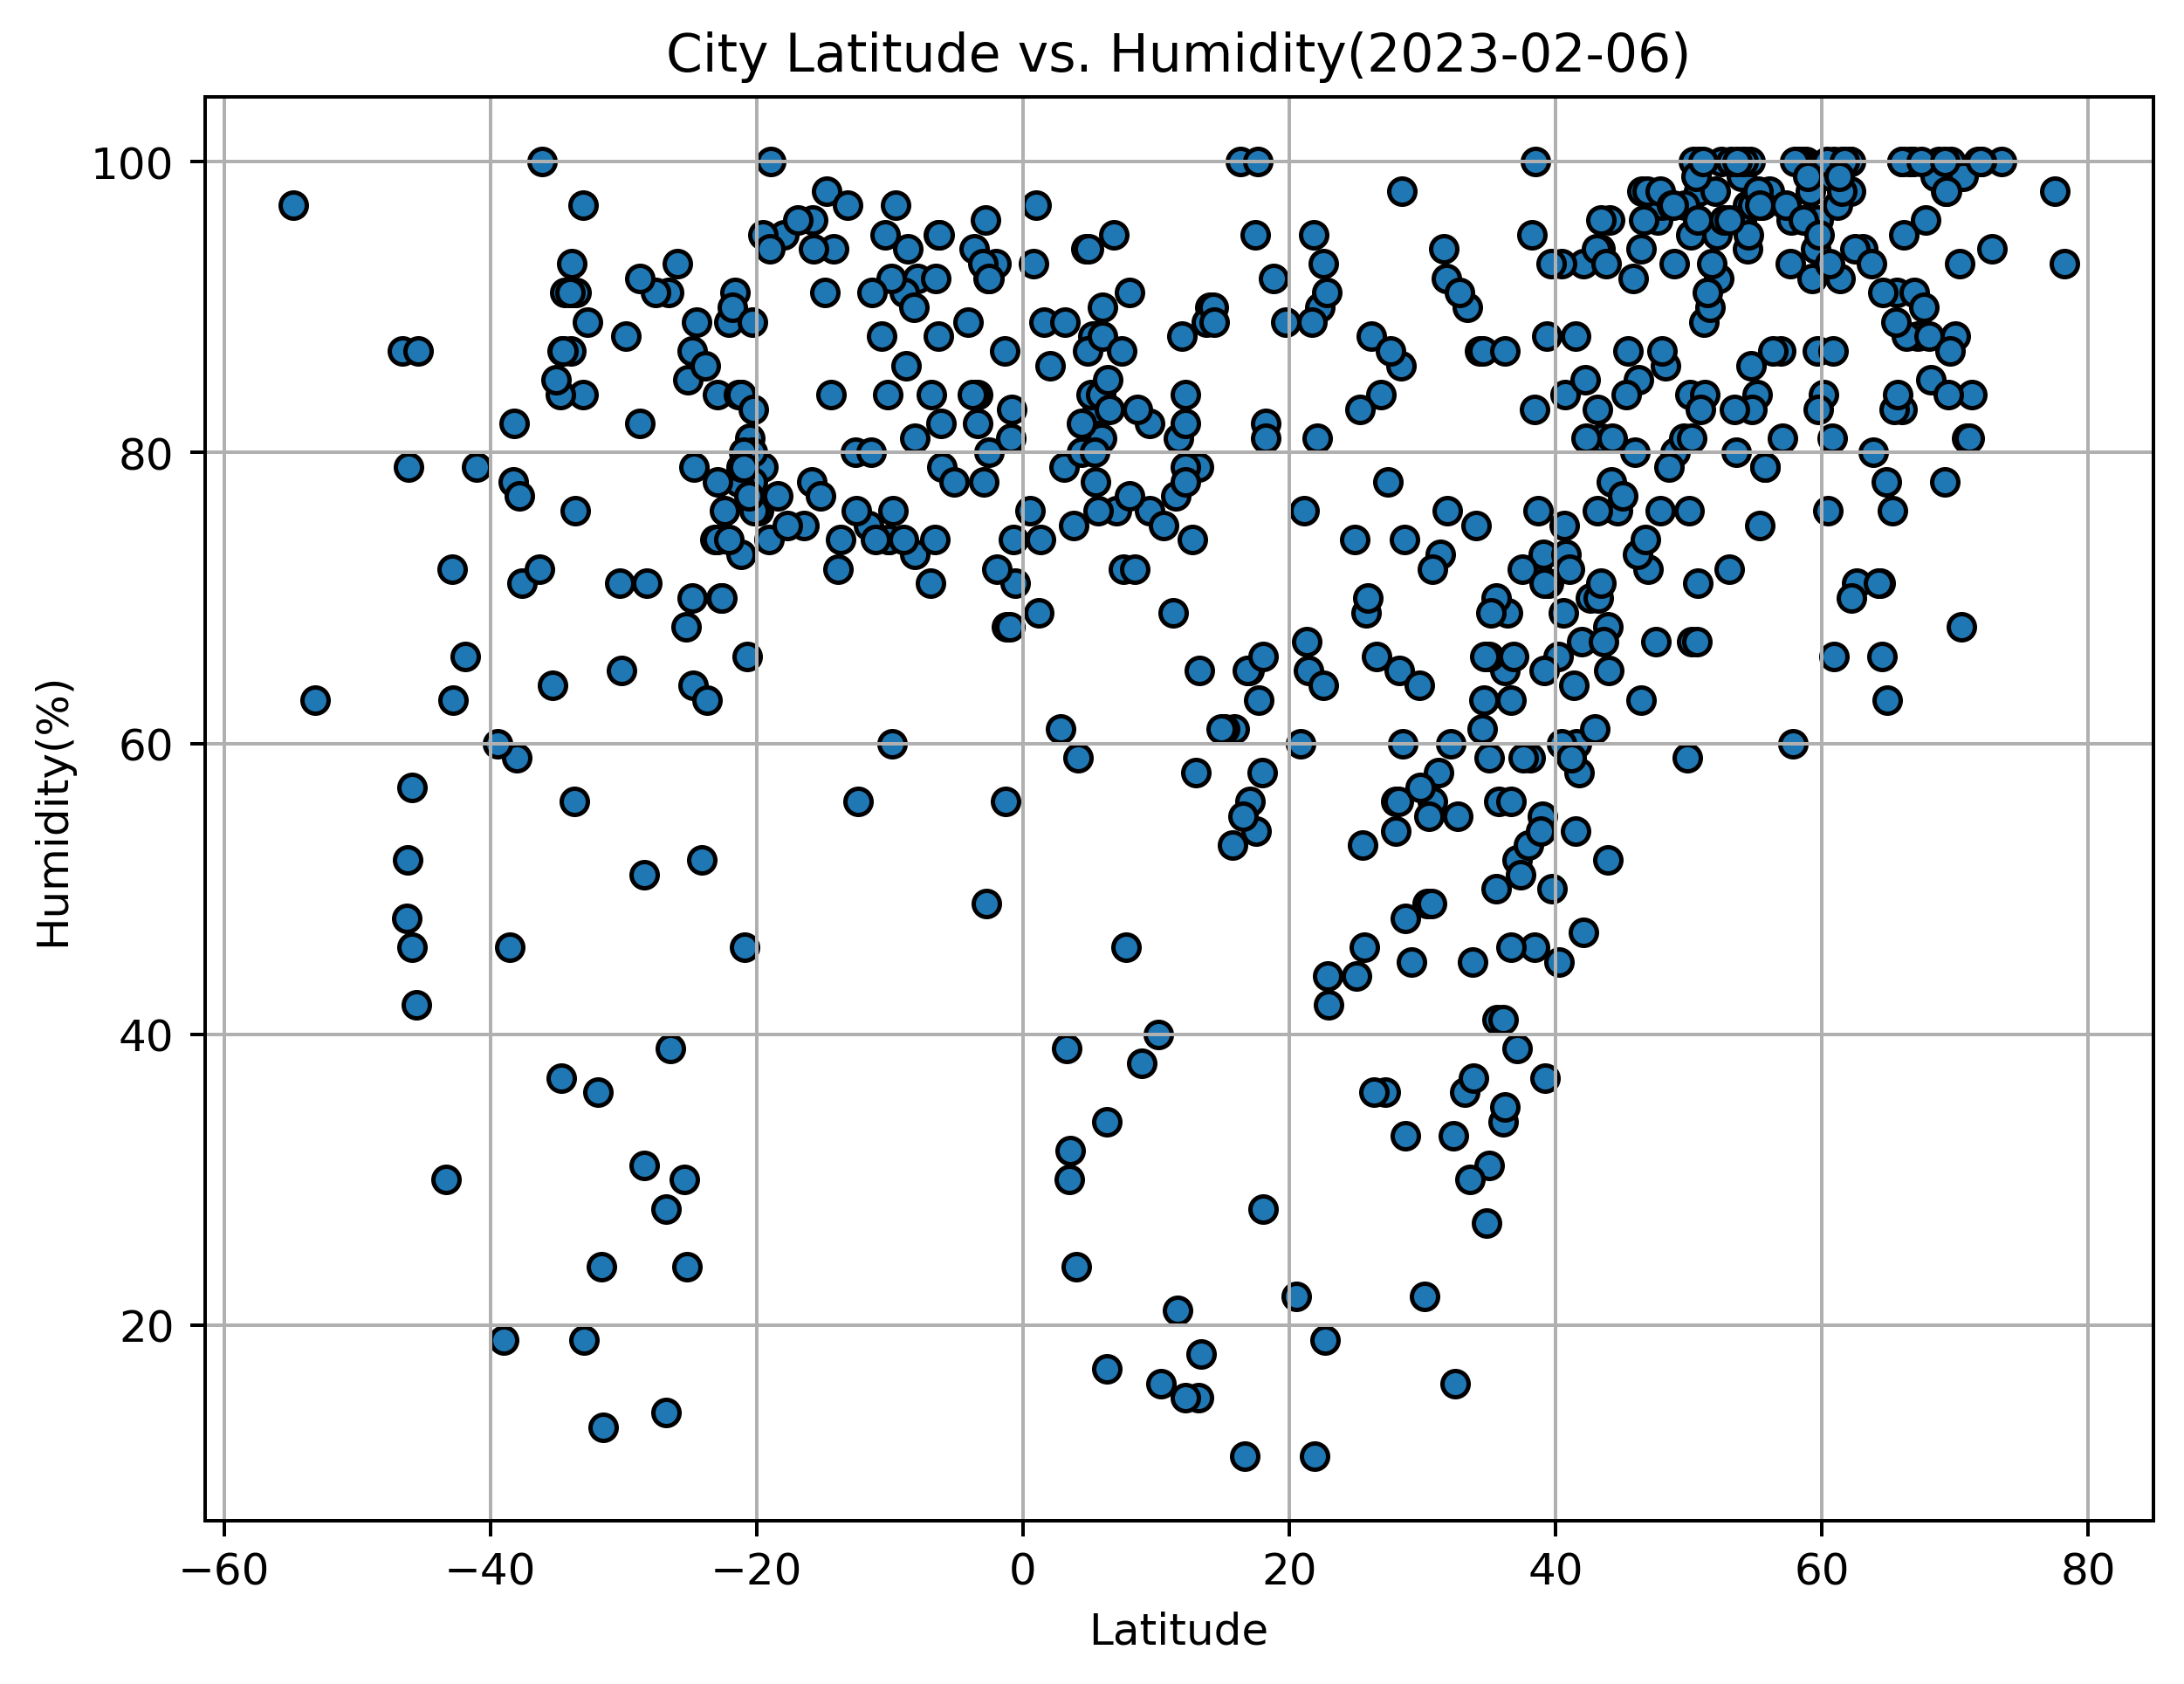

In [50]:
# Creating Scatter plot for latitude vs humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, marker='o', edgecolors='black')

# Adding graph title, axes titles and grid
plt.title('City Latitude vs. Humidity(2023-02-06)')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid()

# Increasing resolution of figure and saving image
plt.rcParams["figure.dpi"] = 360
plt.savefig('Output_Data/Figure2.png')

# Displaying plot
plt.show()

#### Latitude Vs. Cloudiness

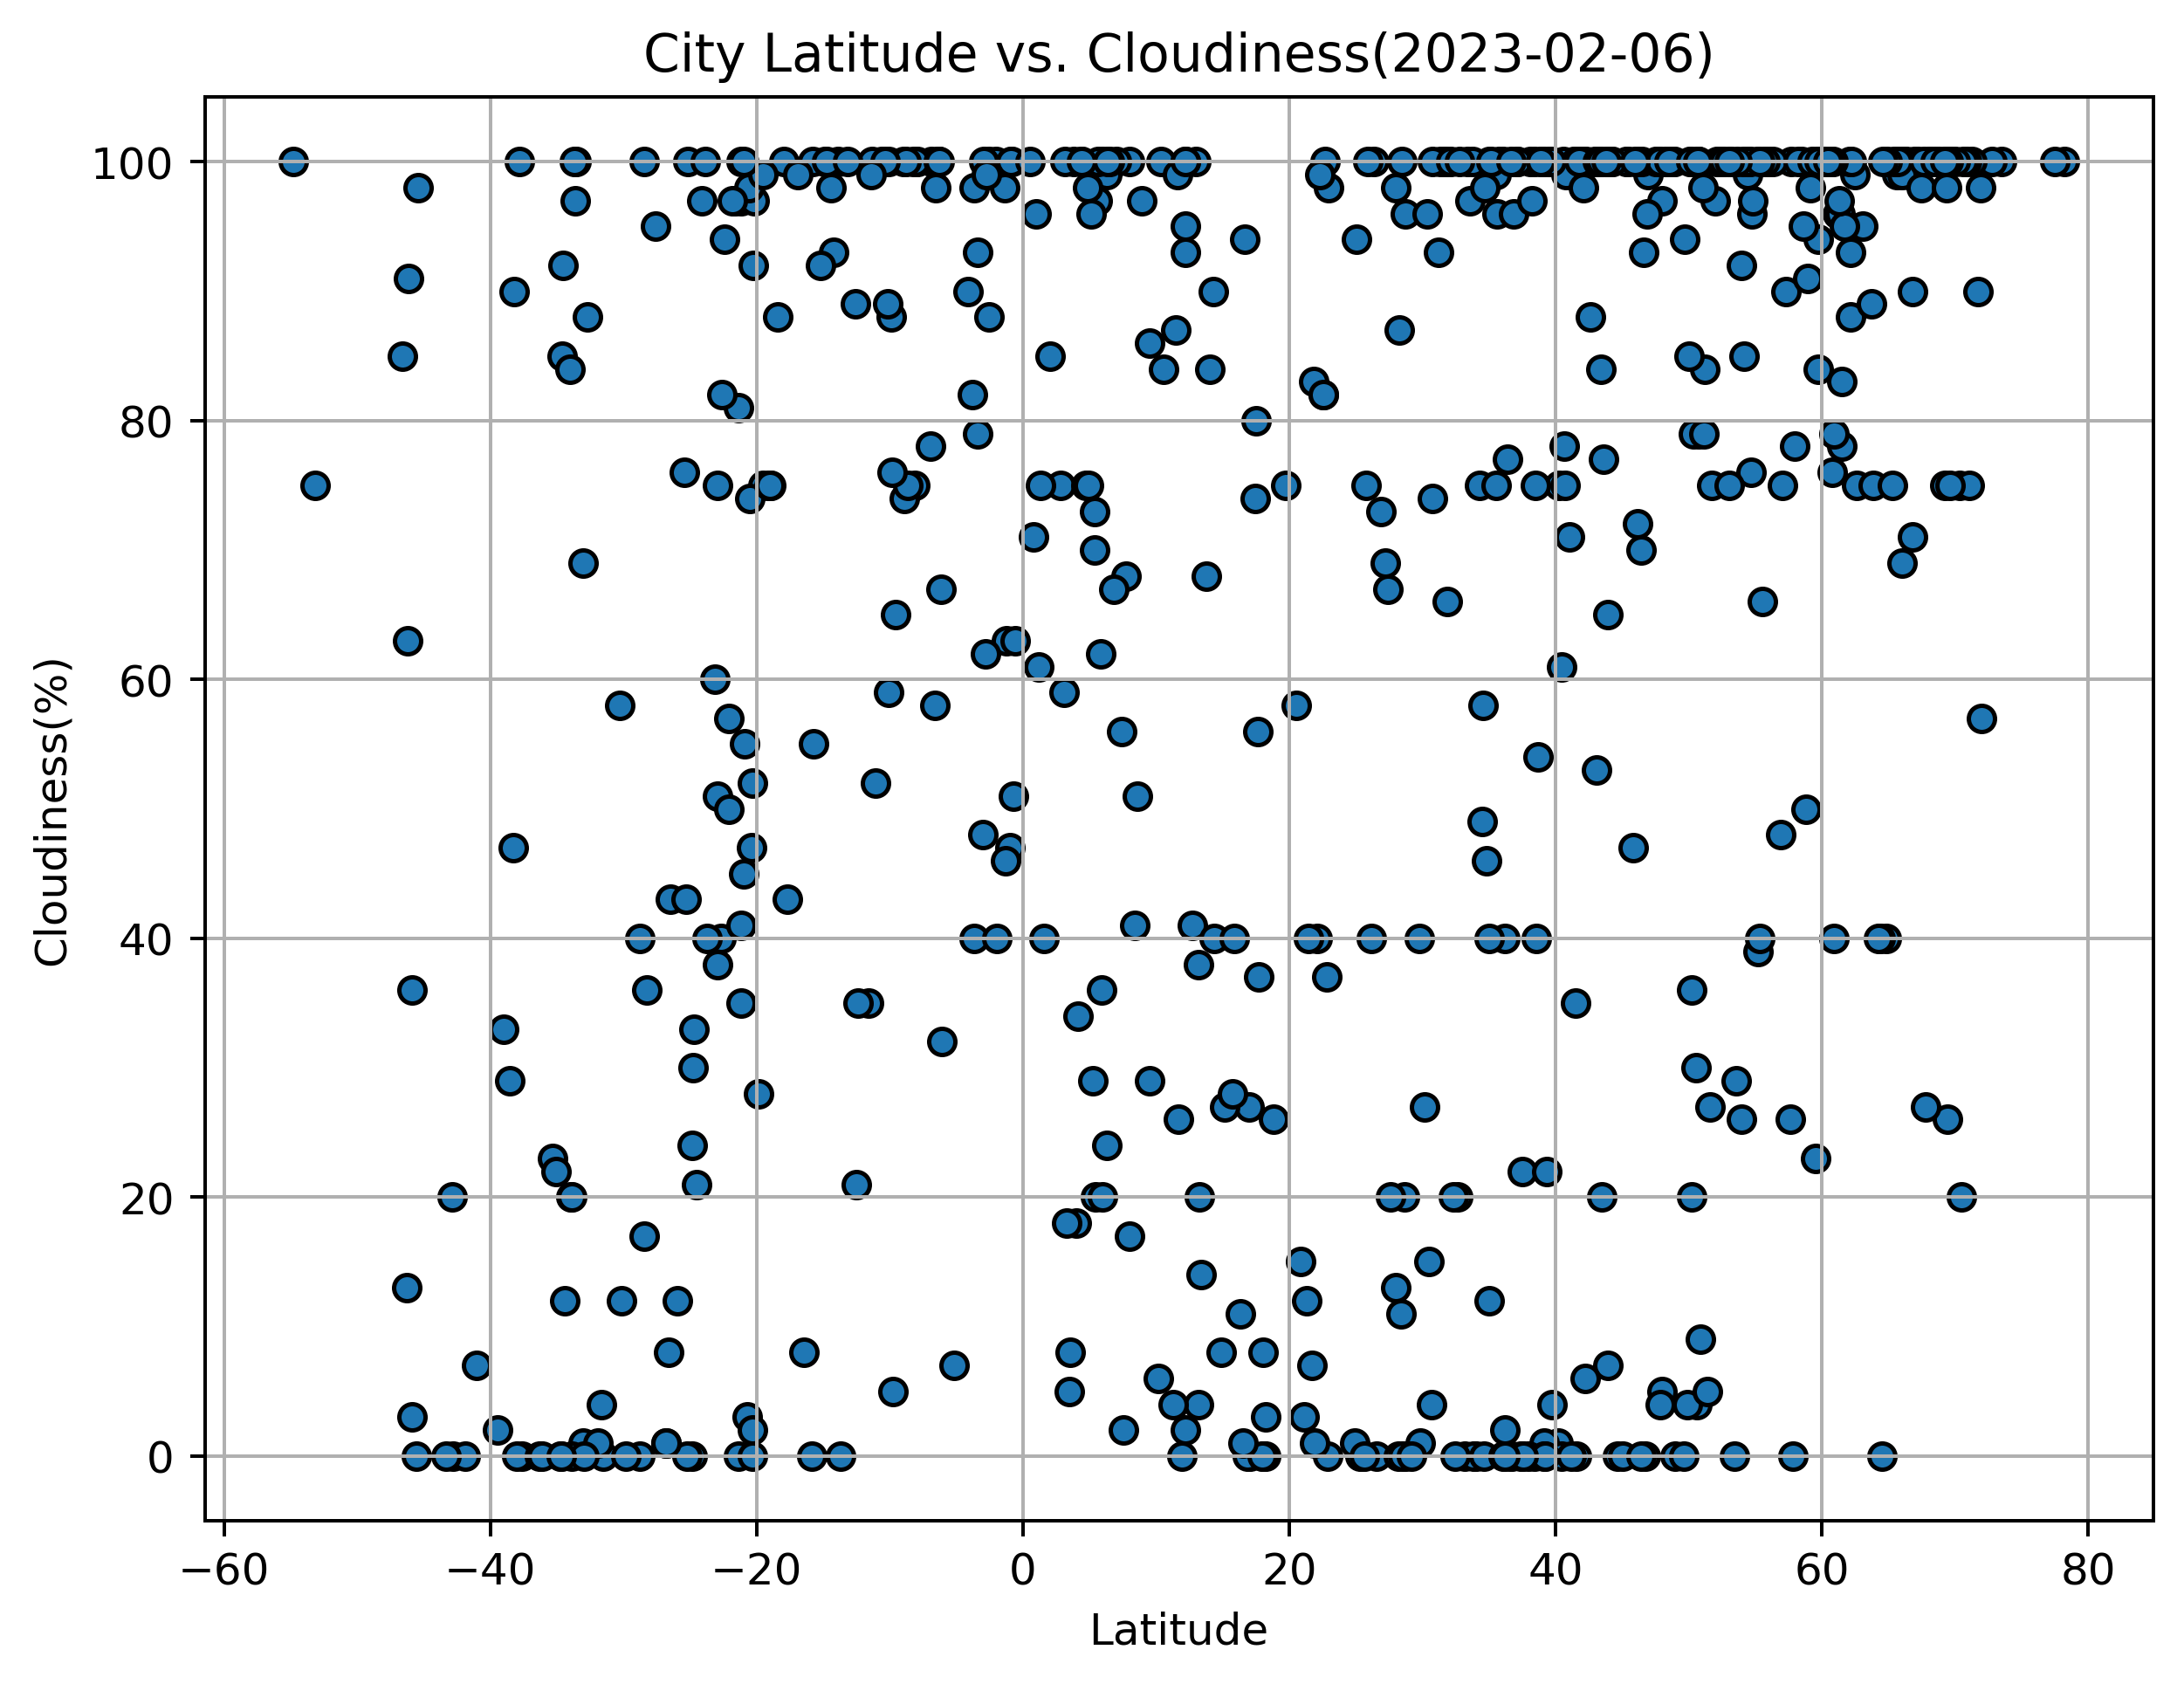

In [51]:
# Creating Scatter plot for latitude vs cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, marker='o', edgecolors='black')

# Adding graph title, axes titles and grid
plt.title('City Latitude vs. Cloudiness(2023-02-06)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid()

# Increasing resolution of figure and saving image
plt.rcParams["figure.dpi"] = 360
plt.savefig('Output_Data/Figure3.png')

# Displaying plot
plt.show()

#### Latitude vs. Wind Speed Plot

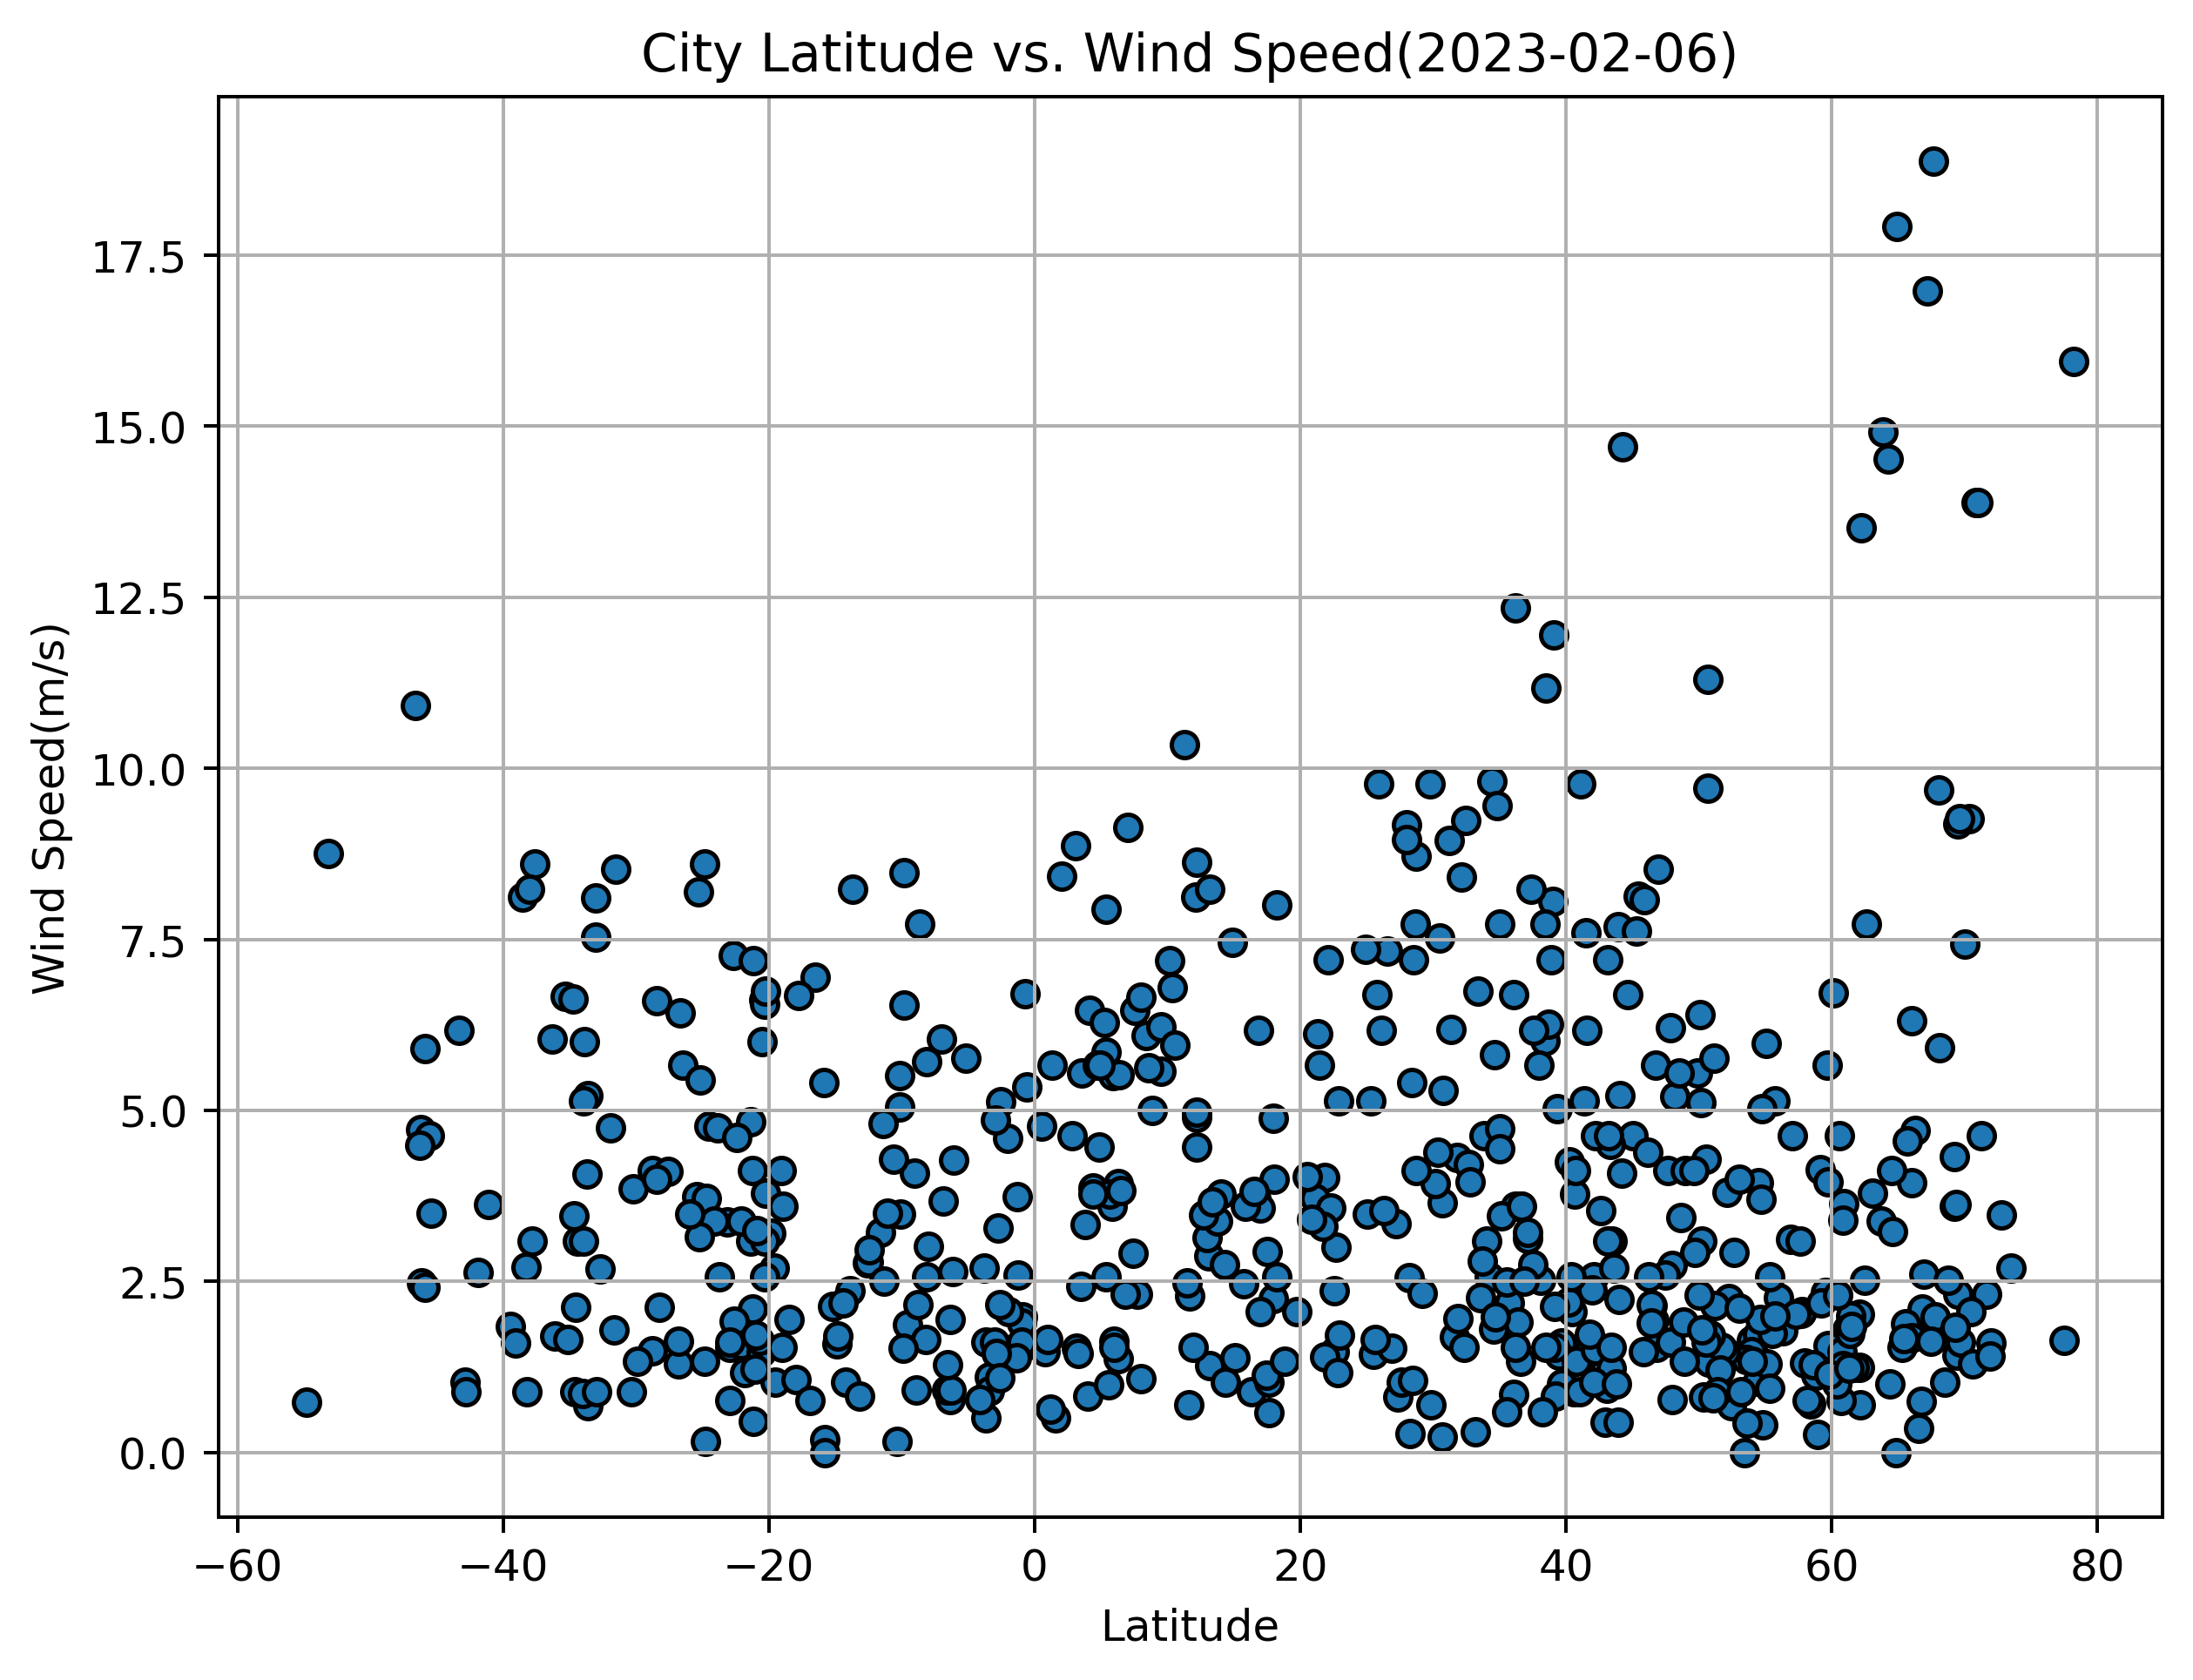

In [52]:
# Creating Scatter plot for latitude vs wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, marker='o', edgecolors='black')

# Adding graph title, axes titles and grid
plt.title('City Latitude vs. Wind Speed(2023-02-06)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.grid()

# Increasing resolution of figure and saving image
plt.rcParams["figure.dpi"] = 360
plt.savefig('Output_Data/Figure4.png')

# Displaying plot
plt.show()

---

## Step 2: Computing Linear Regression for Each Relationship

In [150]:
# Defining a function to generate Linear Regression plots
# The function will require values for reggression and coordinates for the line equation annotation
def linear_regression(x_values,y_values,x,y):
    
    # Entering values into linregress function to generate and store necessary parameters
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Getting regression values
    regress_values = x_values * slope + intercept

    # Setting up line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    # Creating plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Adding labels and annotating line equation
    plt.xlabel('Latitude')
    plt.ylabel(y_values.name)
    plt.annotate(line_eq,(x,y),fontsize=15,color="red")

    # Printing r value
    print(f"The r-value is: {rvalue**2}")

    # Displaying Plot
    plt.show()

In [151]:
# Creating a DataFrame with only Northern Hemisphere data
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >=0, :]

# Displaying a sample of the data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,nevel,56.0209,29.9284,-1.73,98,100,2.26,RU,1675717708
7,albany,42.6001,-73.9662,2.72,70,88,3.54,US,1675717709
8,tuljapur,18.0000,76.0833,22.49,28,8,2.25,IN,1675717709
9,jamestown,42.0970,-79.2353,-1.10,93,100,2.57,US,1675717654
10,port blair,11.6667,92.7500,25.41,81,26,2.29,IN,1675717710


In [152]:
# Creating a DataFrame with only Southern Hemisphere data
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <0, :]

# Displaying a sample of the data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chokwe,-24.5333,32.9833,23.15,89,21,4.77,MZ,1675717707
1,hobart,-42.8794,147.3294,15.03,72,20,1.03,AU,1675717652
2,atuona,-9.8000,-139.0333,25.61,76,5,6.54,PF,1675717707
4,avarua,-21.2078,-159.7750,29.03,84,97,4.12,CK,1675717708
5,necochea,-38.5473,-58.7368,21.06,46,29,8.12,AR,1675717708


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7049805957012815


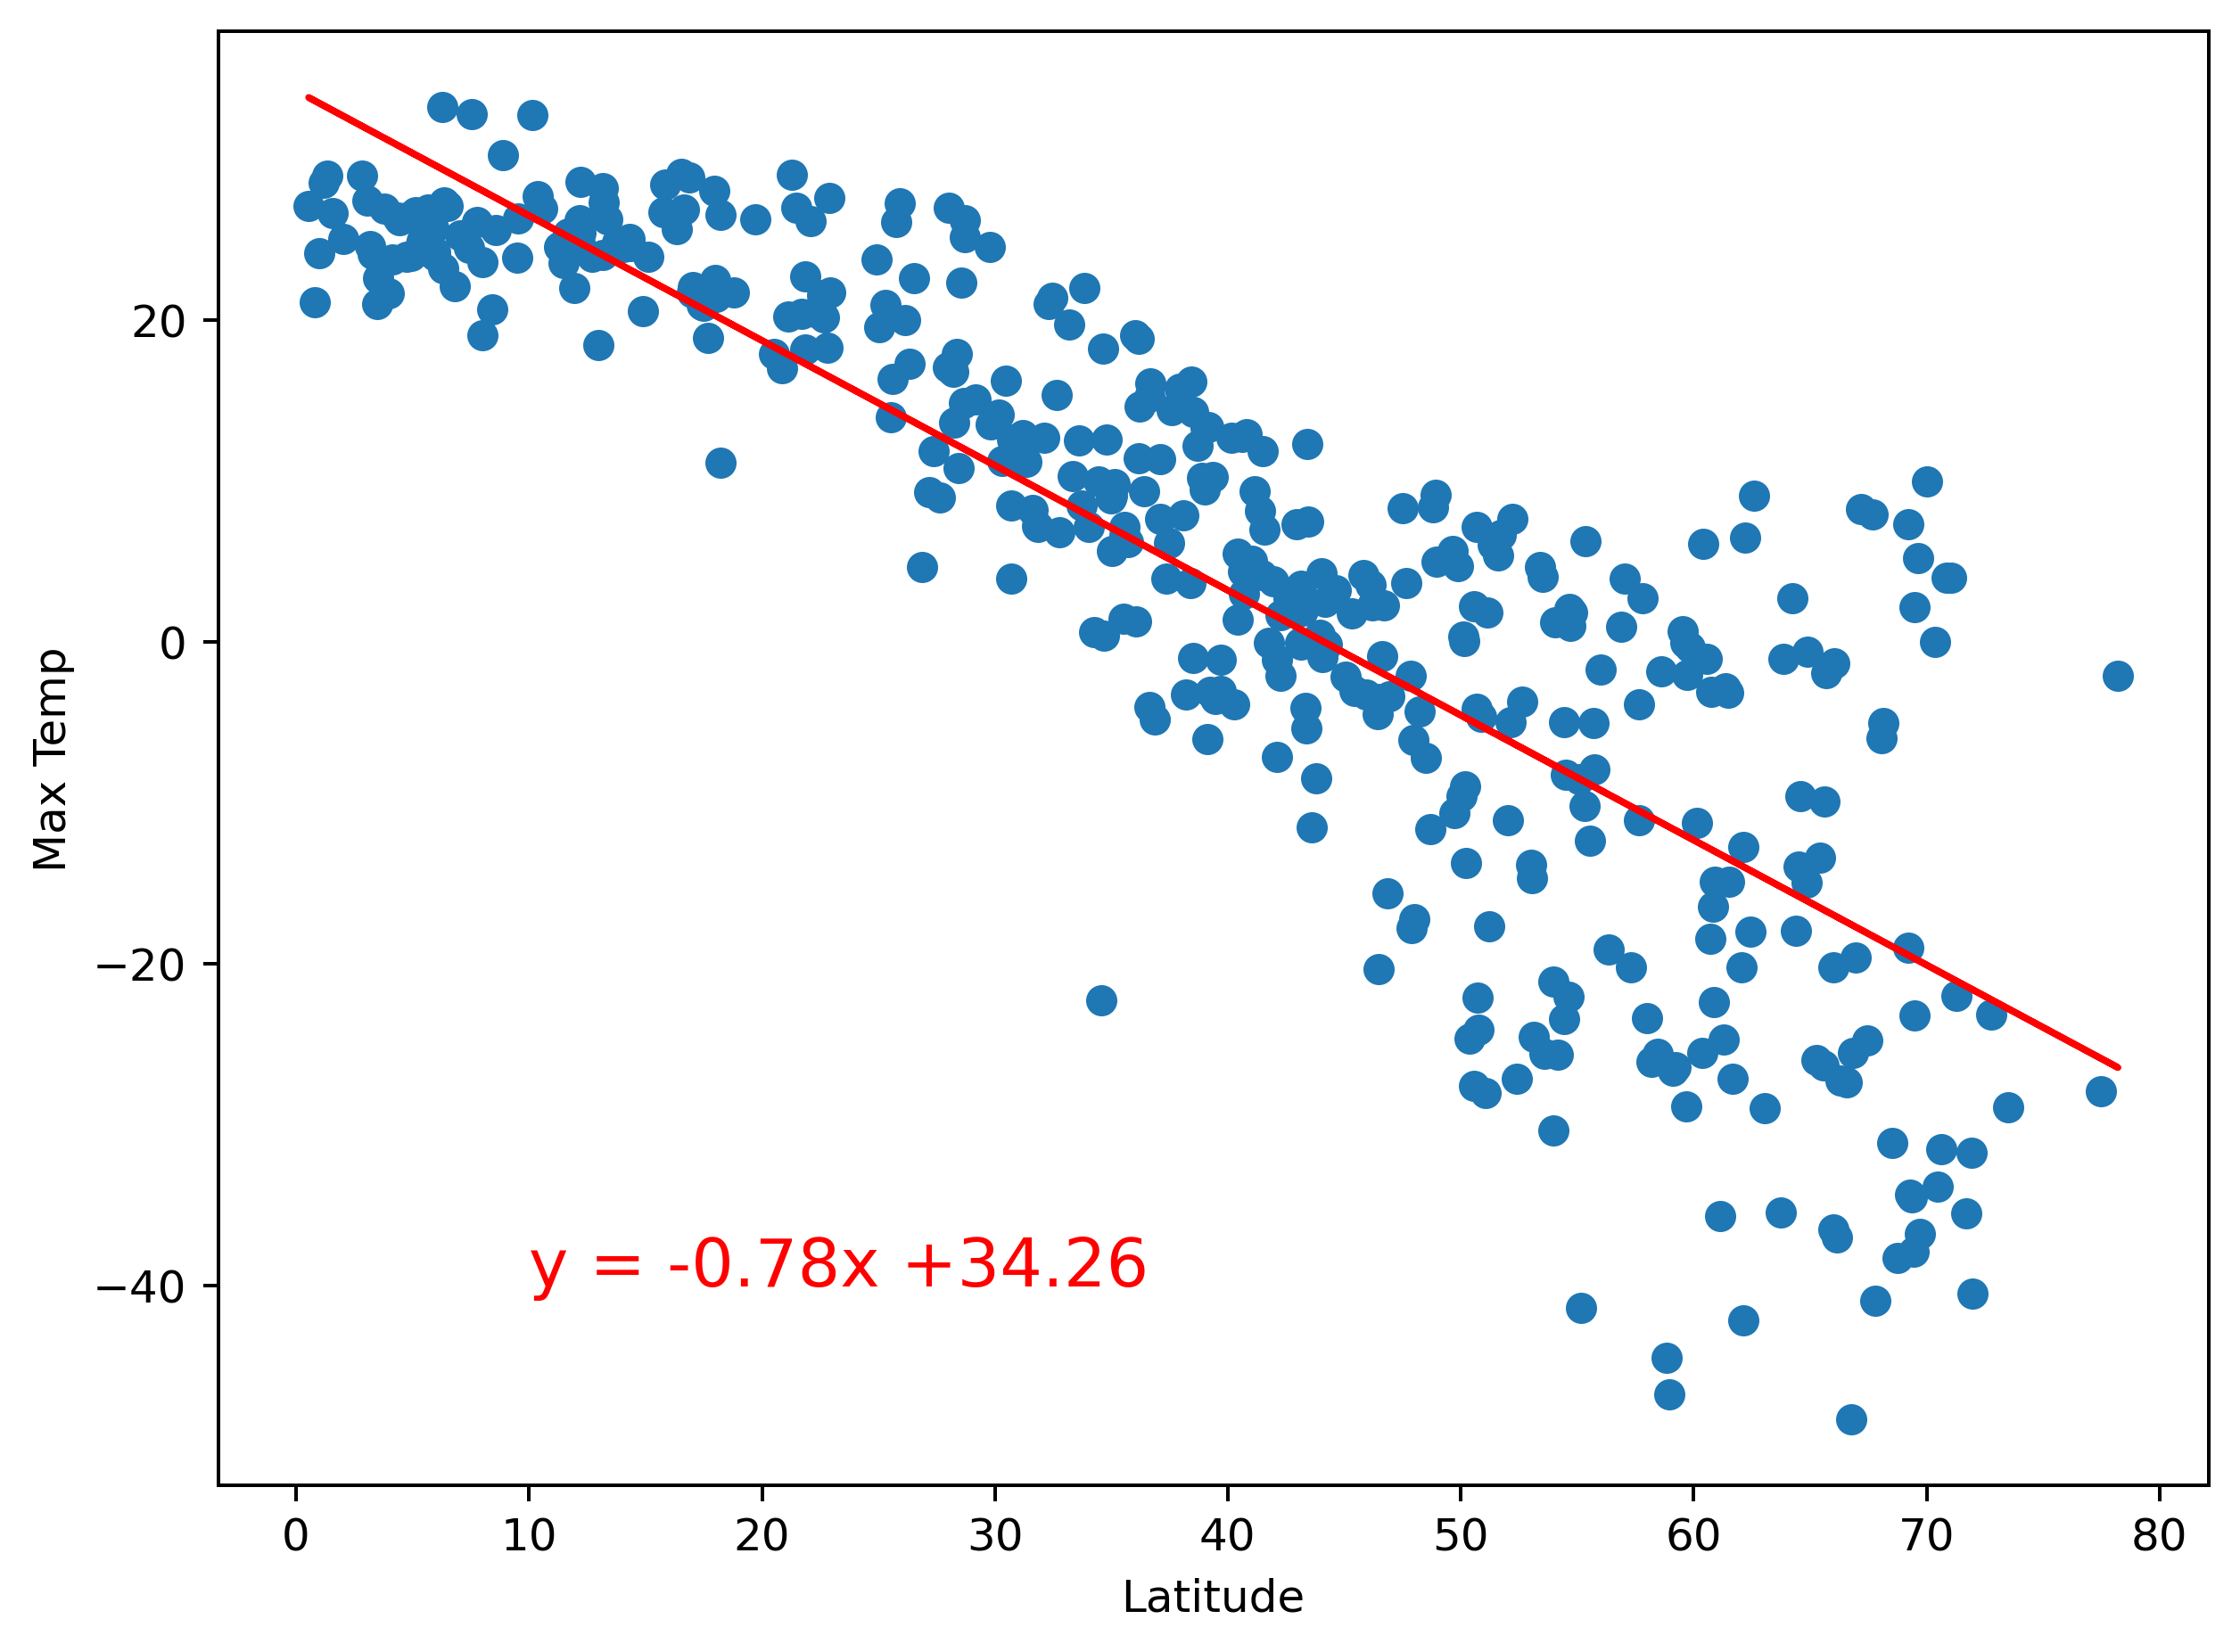

In [153]:
# Linear regression for Northern Hemisphere using defined function
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 10, -40)

The r-value is: 0.08077522660227947


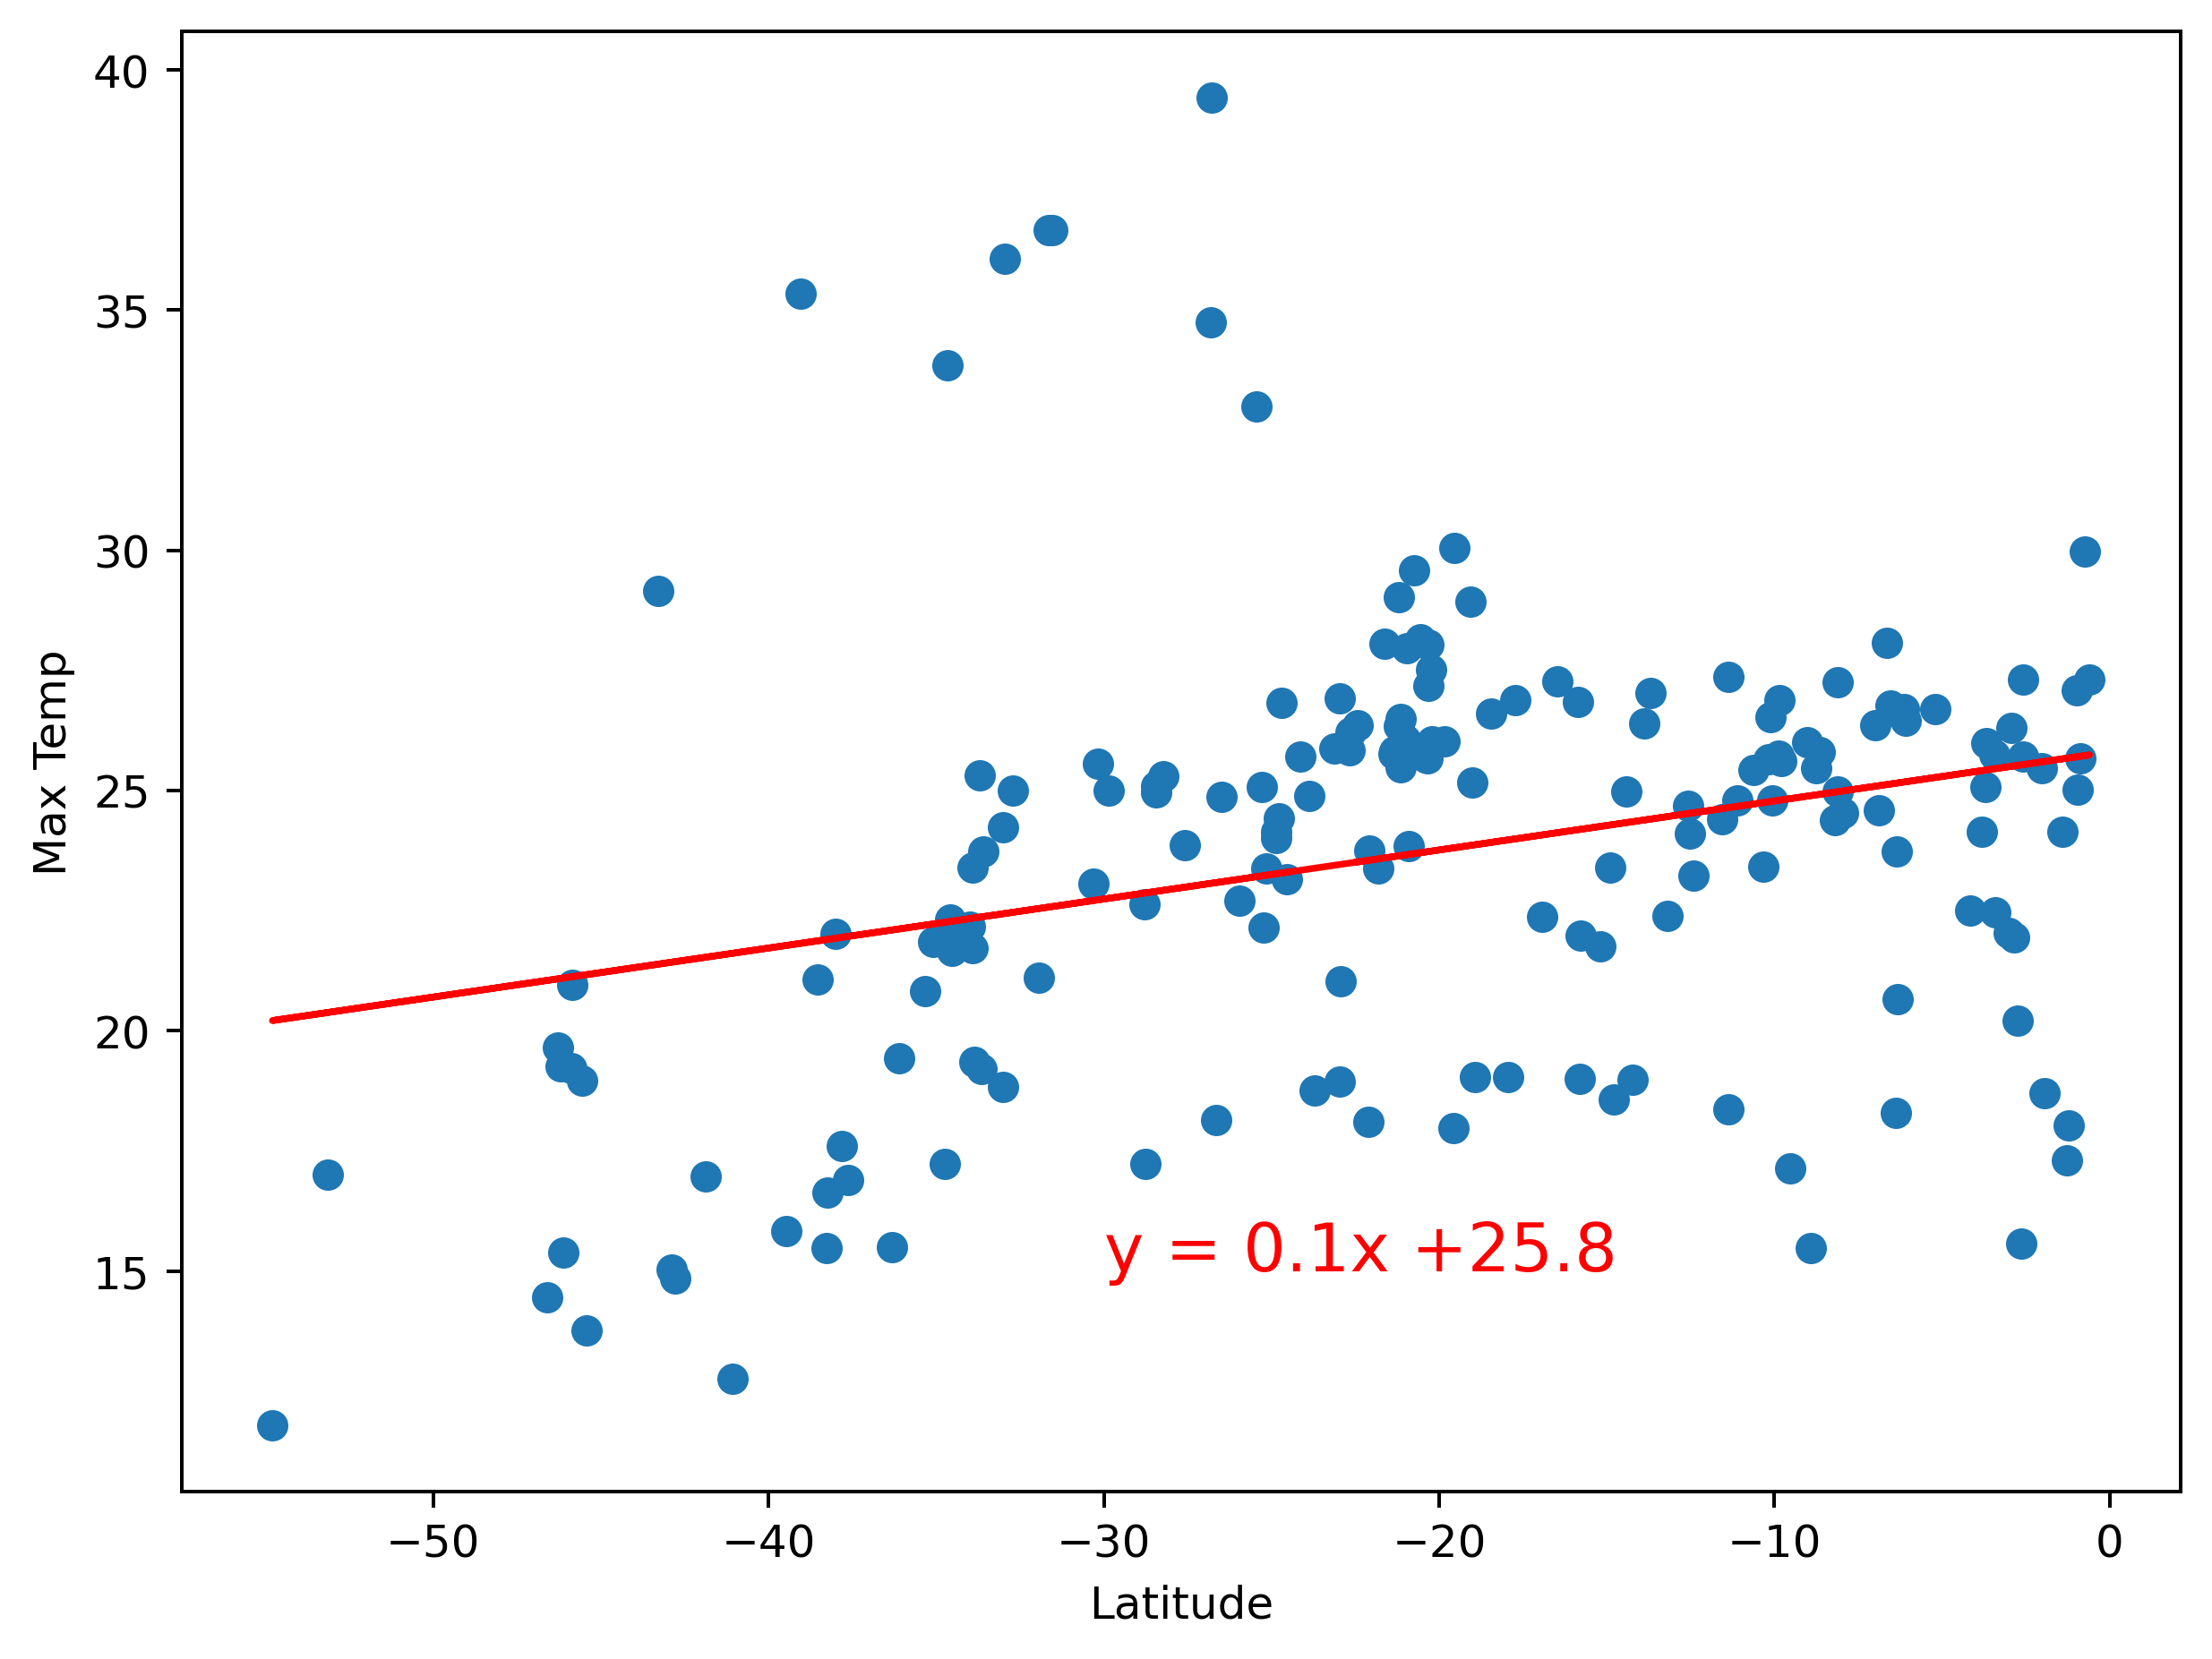

In [154]:
# Linear regression for Southern Hemisphere using defined function
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], -30, 15)

**Discussion about the linear relationship:**
- The plots show that in the northern hemisphere latitude has a significant negative correlation to maximum temperature and is likely a main factor determining max temperature as the r-squared value is high, showing the model describes roughy 70% of the variance in the data. As latitude increases max temperature decreases.

- The plots show that in the southern hemisphere latitude has only a slight positive correlation to max temperature, with an increase in latitude giving a slight increase in max temp. However the low r squared value indicating this model does not explain much of the variance in the data. Latitude is not a significant factor here.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.18644091647590125


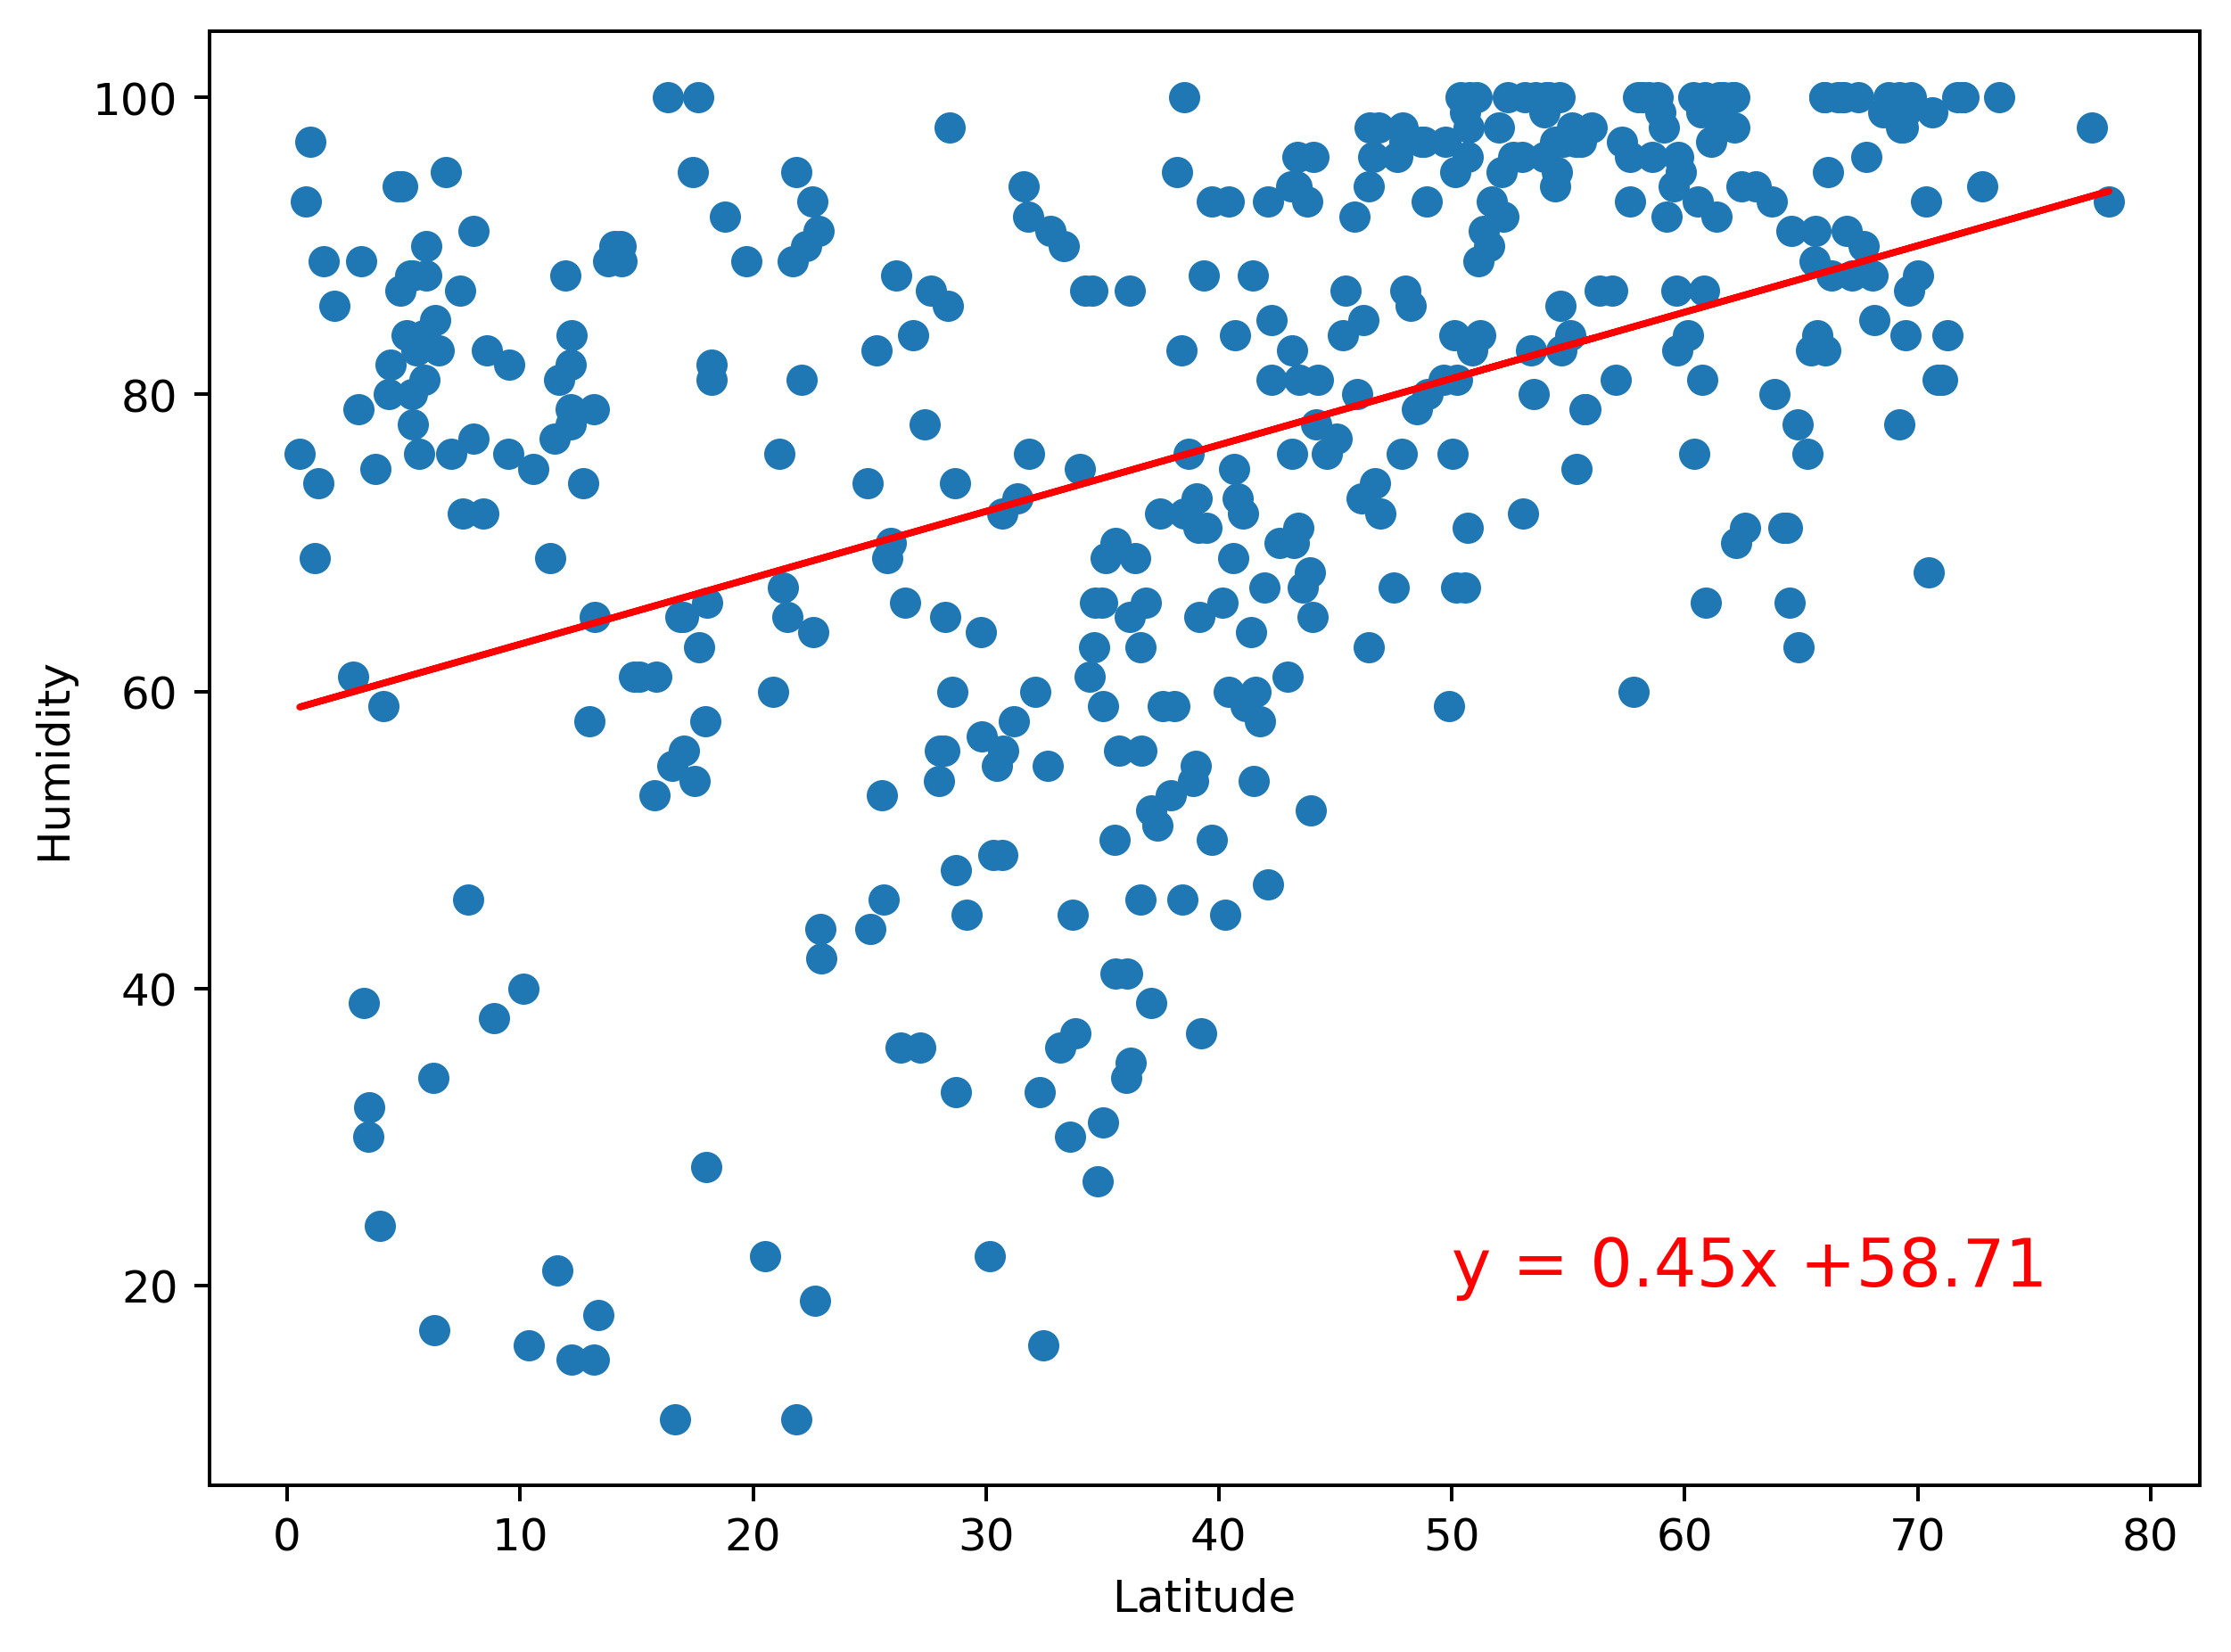

In [155]:
# Linear regression for Northern Hemisphere using defined function
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 50, 20)

The r-value is: 0.10256256616494934


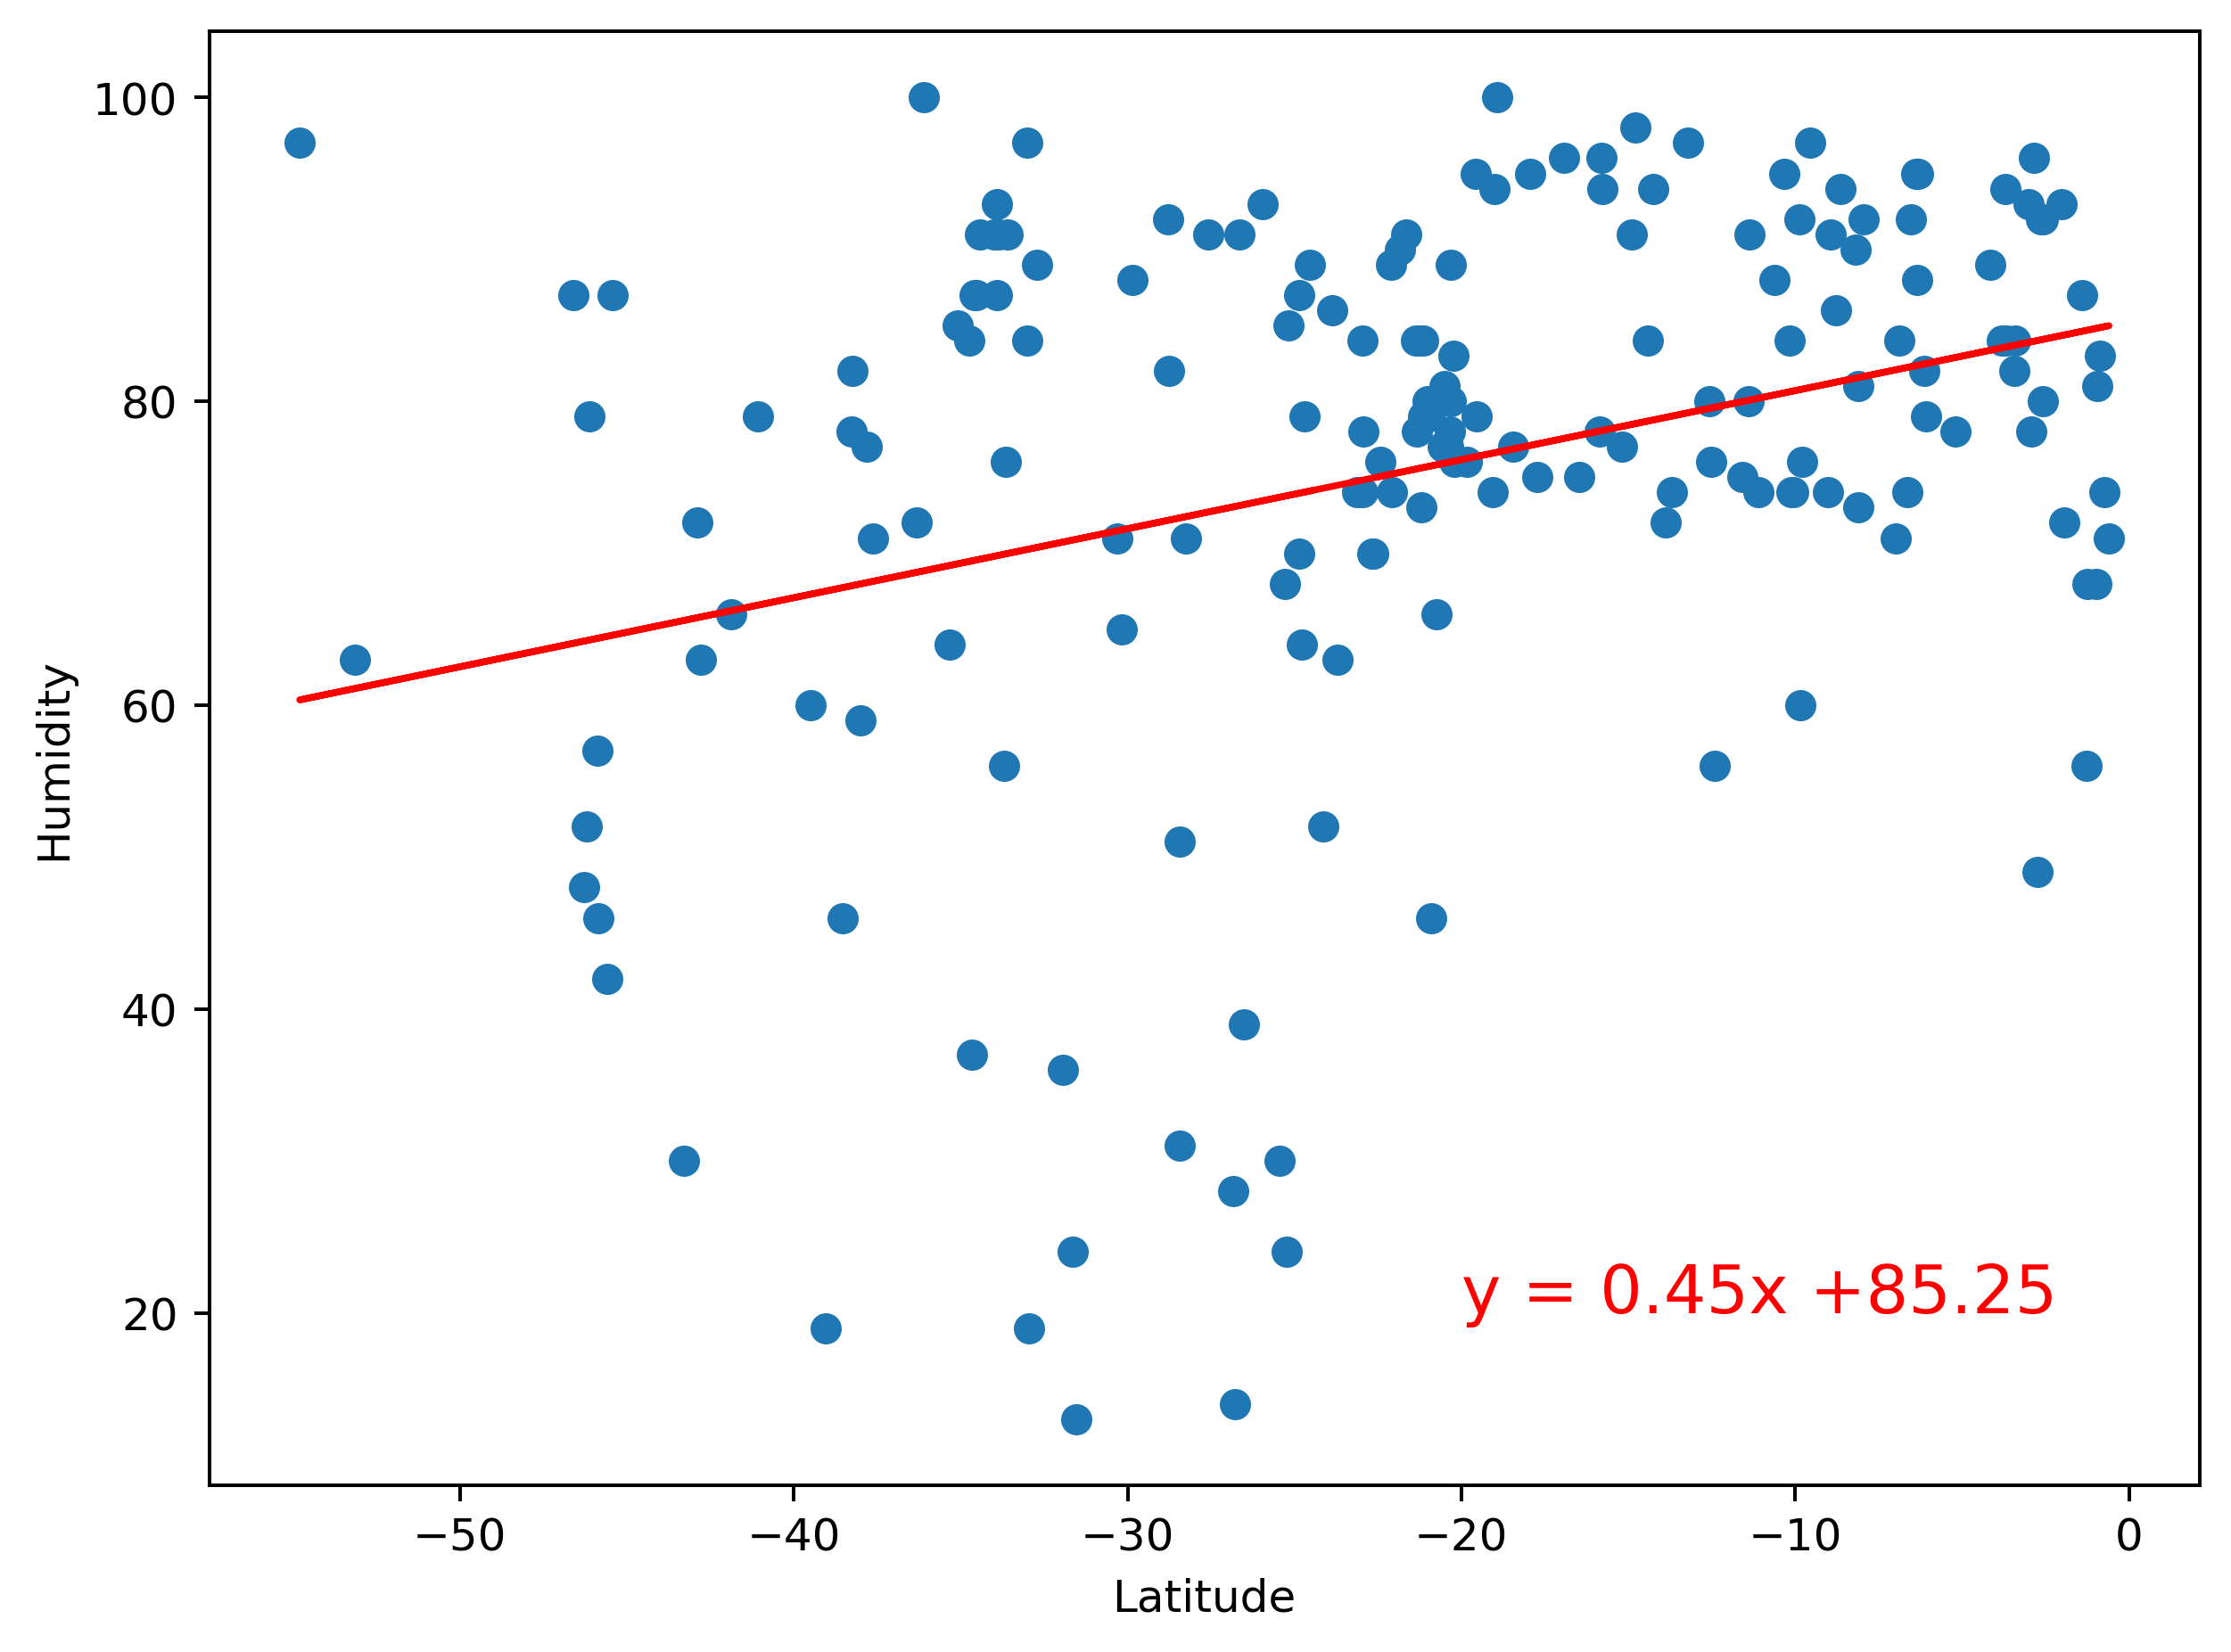

In [157]:
# Linear regression for Southern Hemisphere using defined function
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], -20, 20)

**Discussion about the linear relationship:**
- In both hemispheres the plots show latitude has a low to moderate positive correlation with humidity, however the low r squared values indicate the models do not explain much of the variability in the data. The linear relationship between latitude and humidity is weak.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.08652680889359884


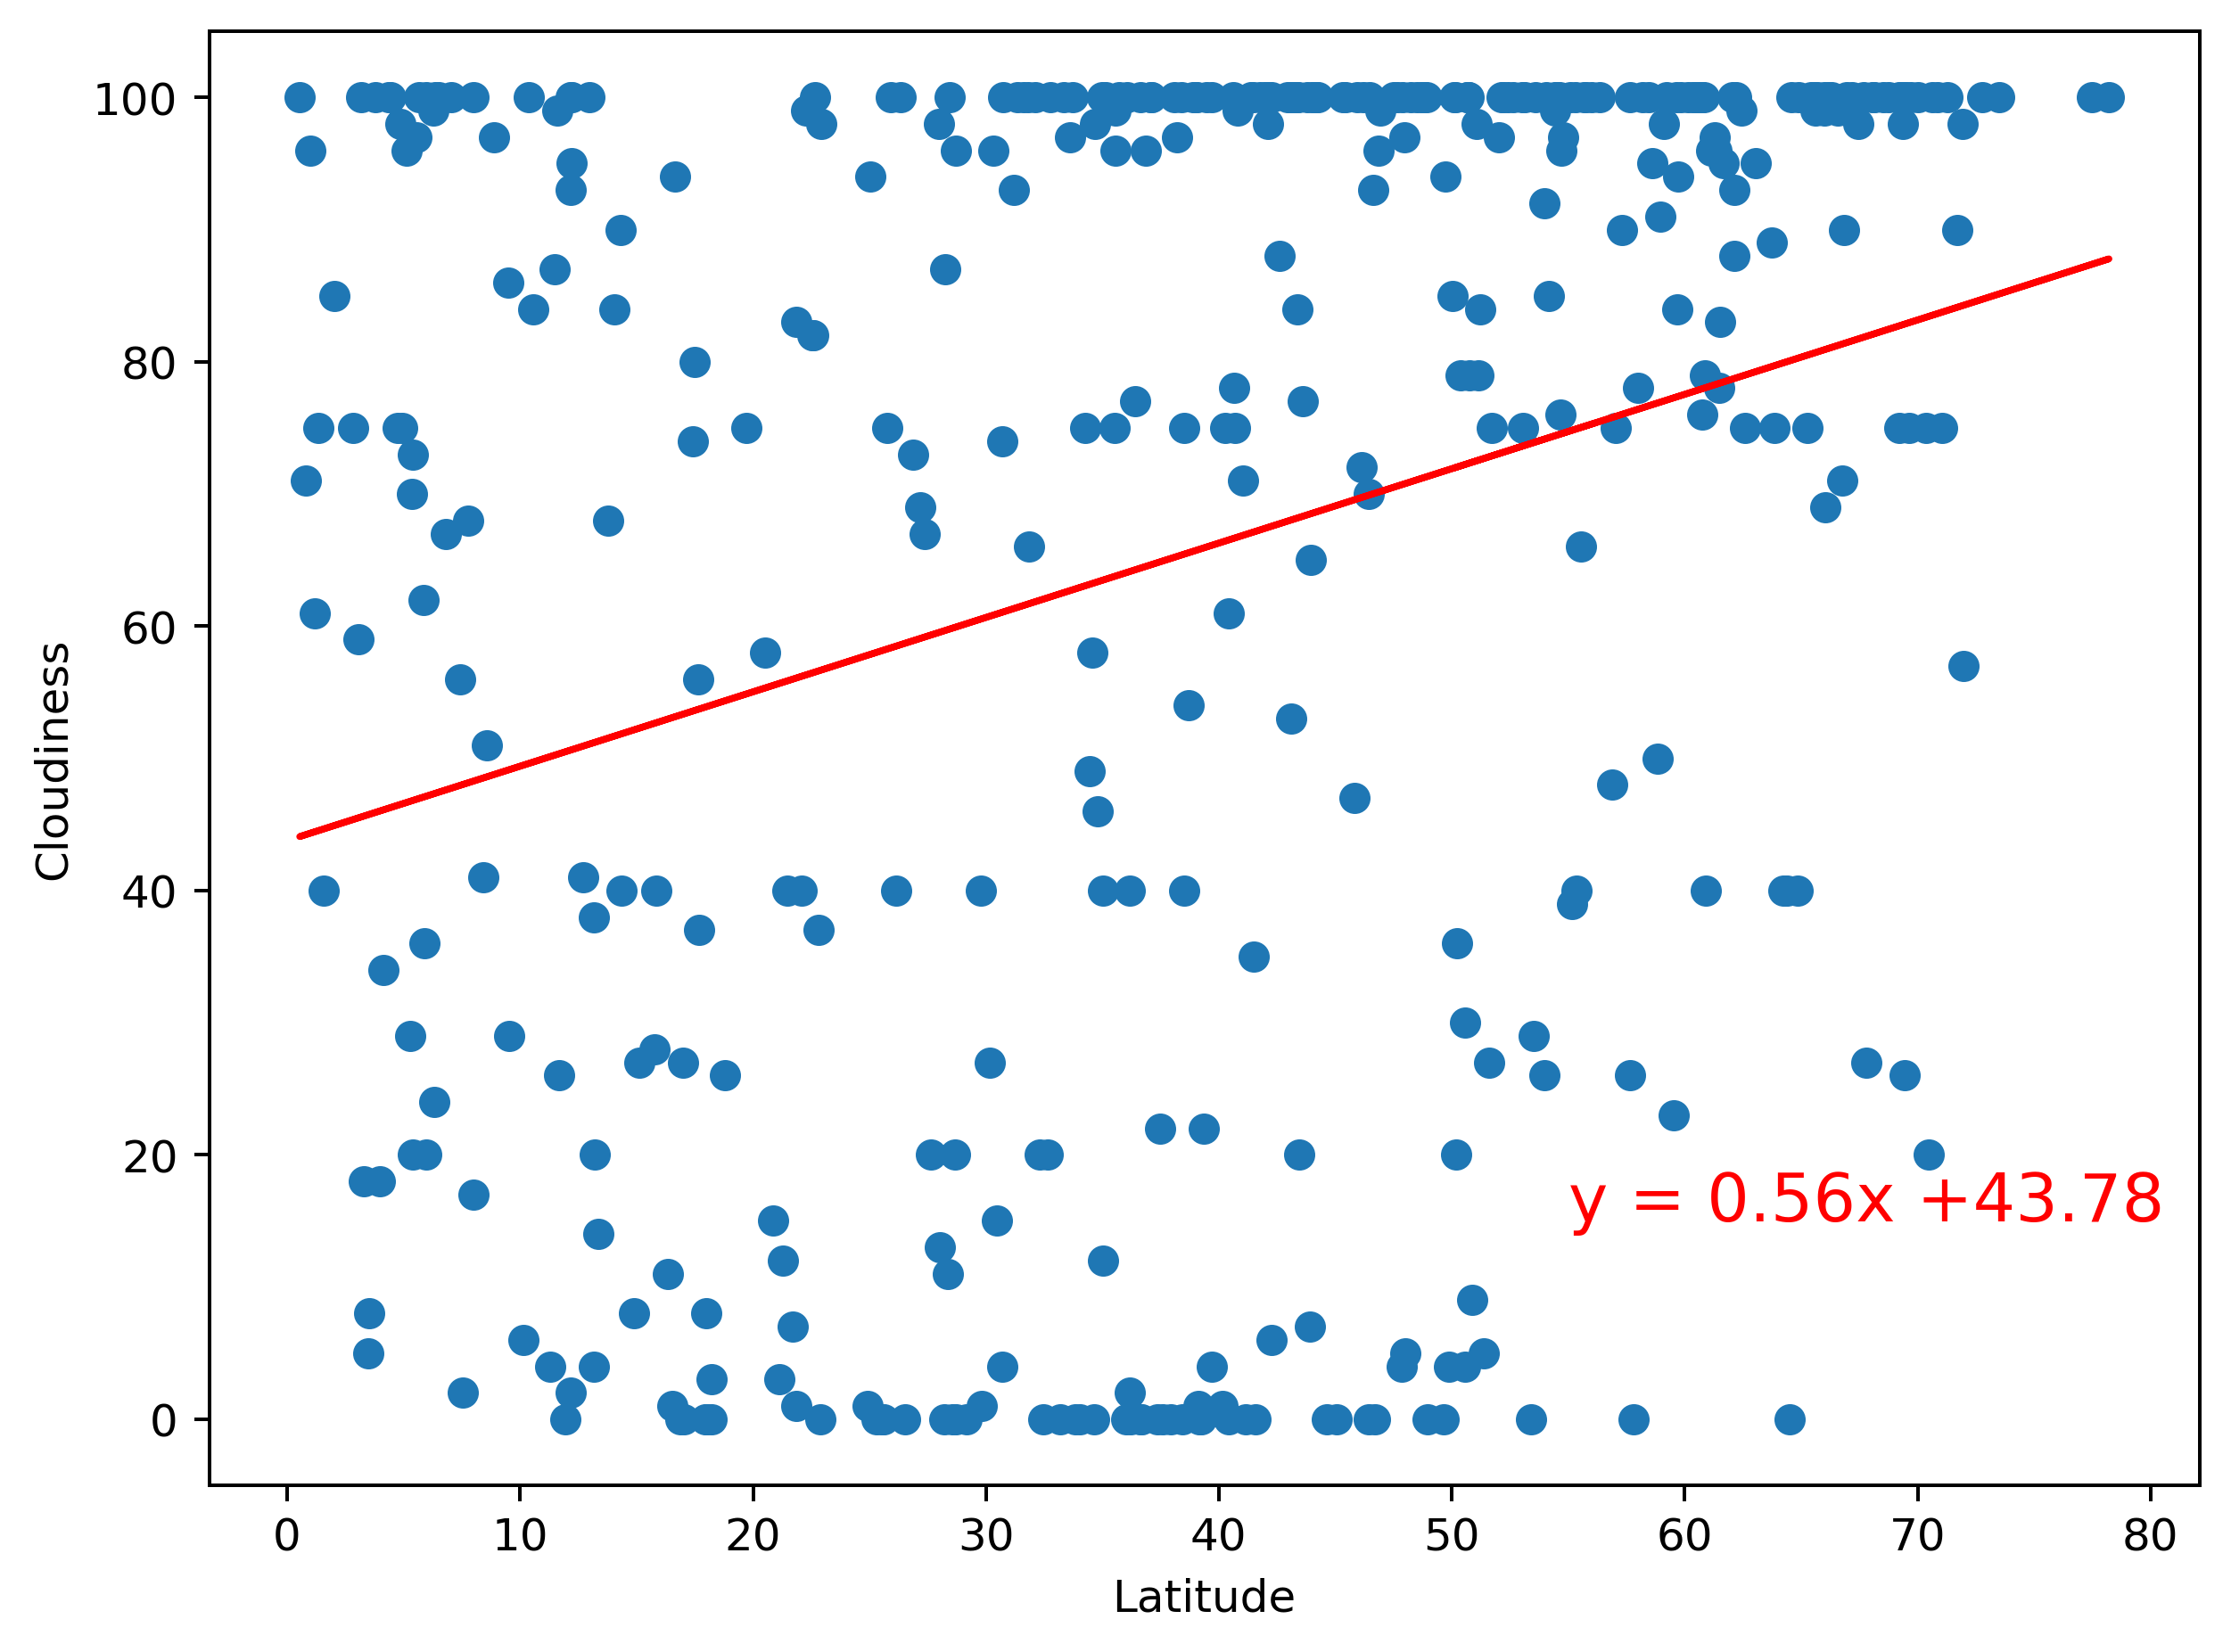

In [158]:
# Linear regression for Northern Hemisphere using defined function
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 55, 15)

The r-value is: 0.16401025951276552


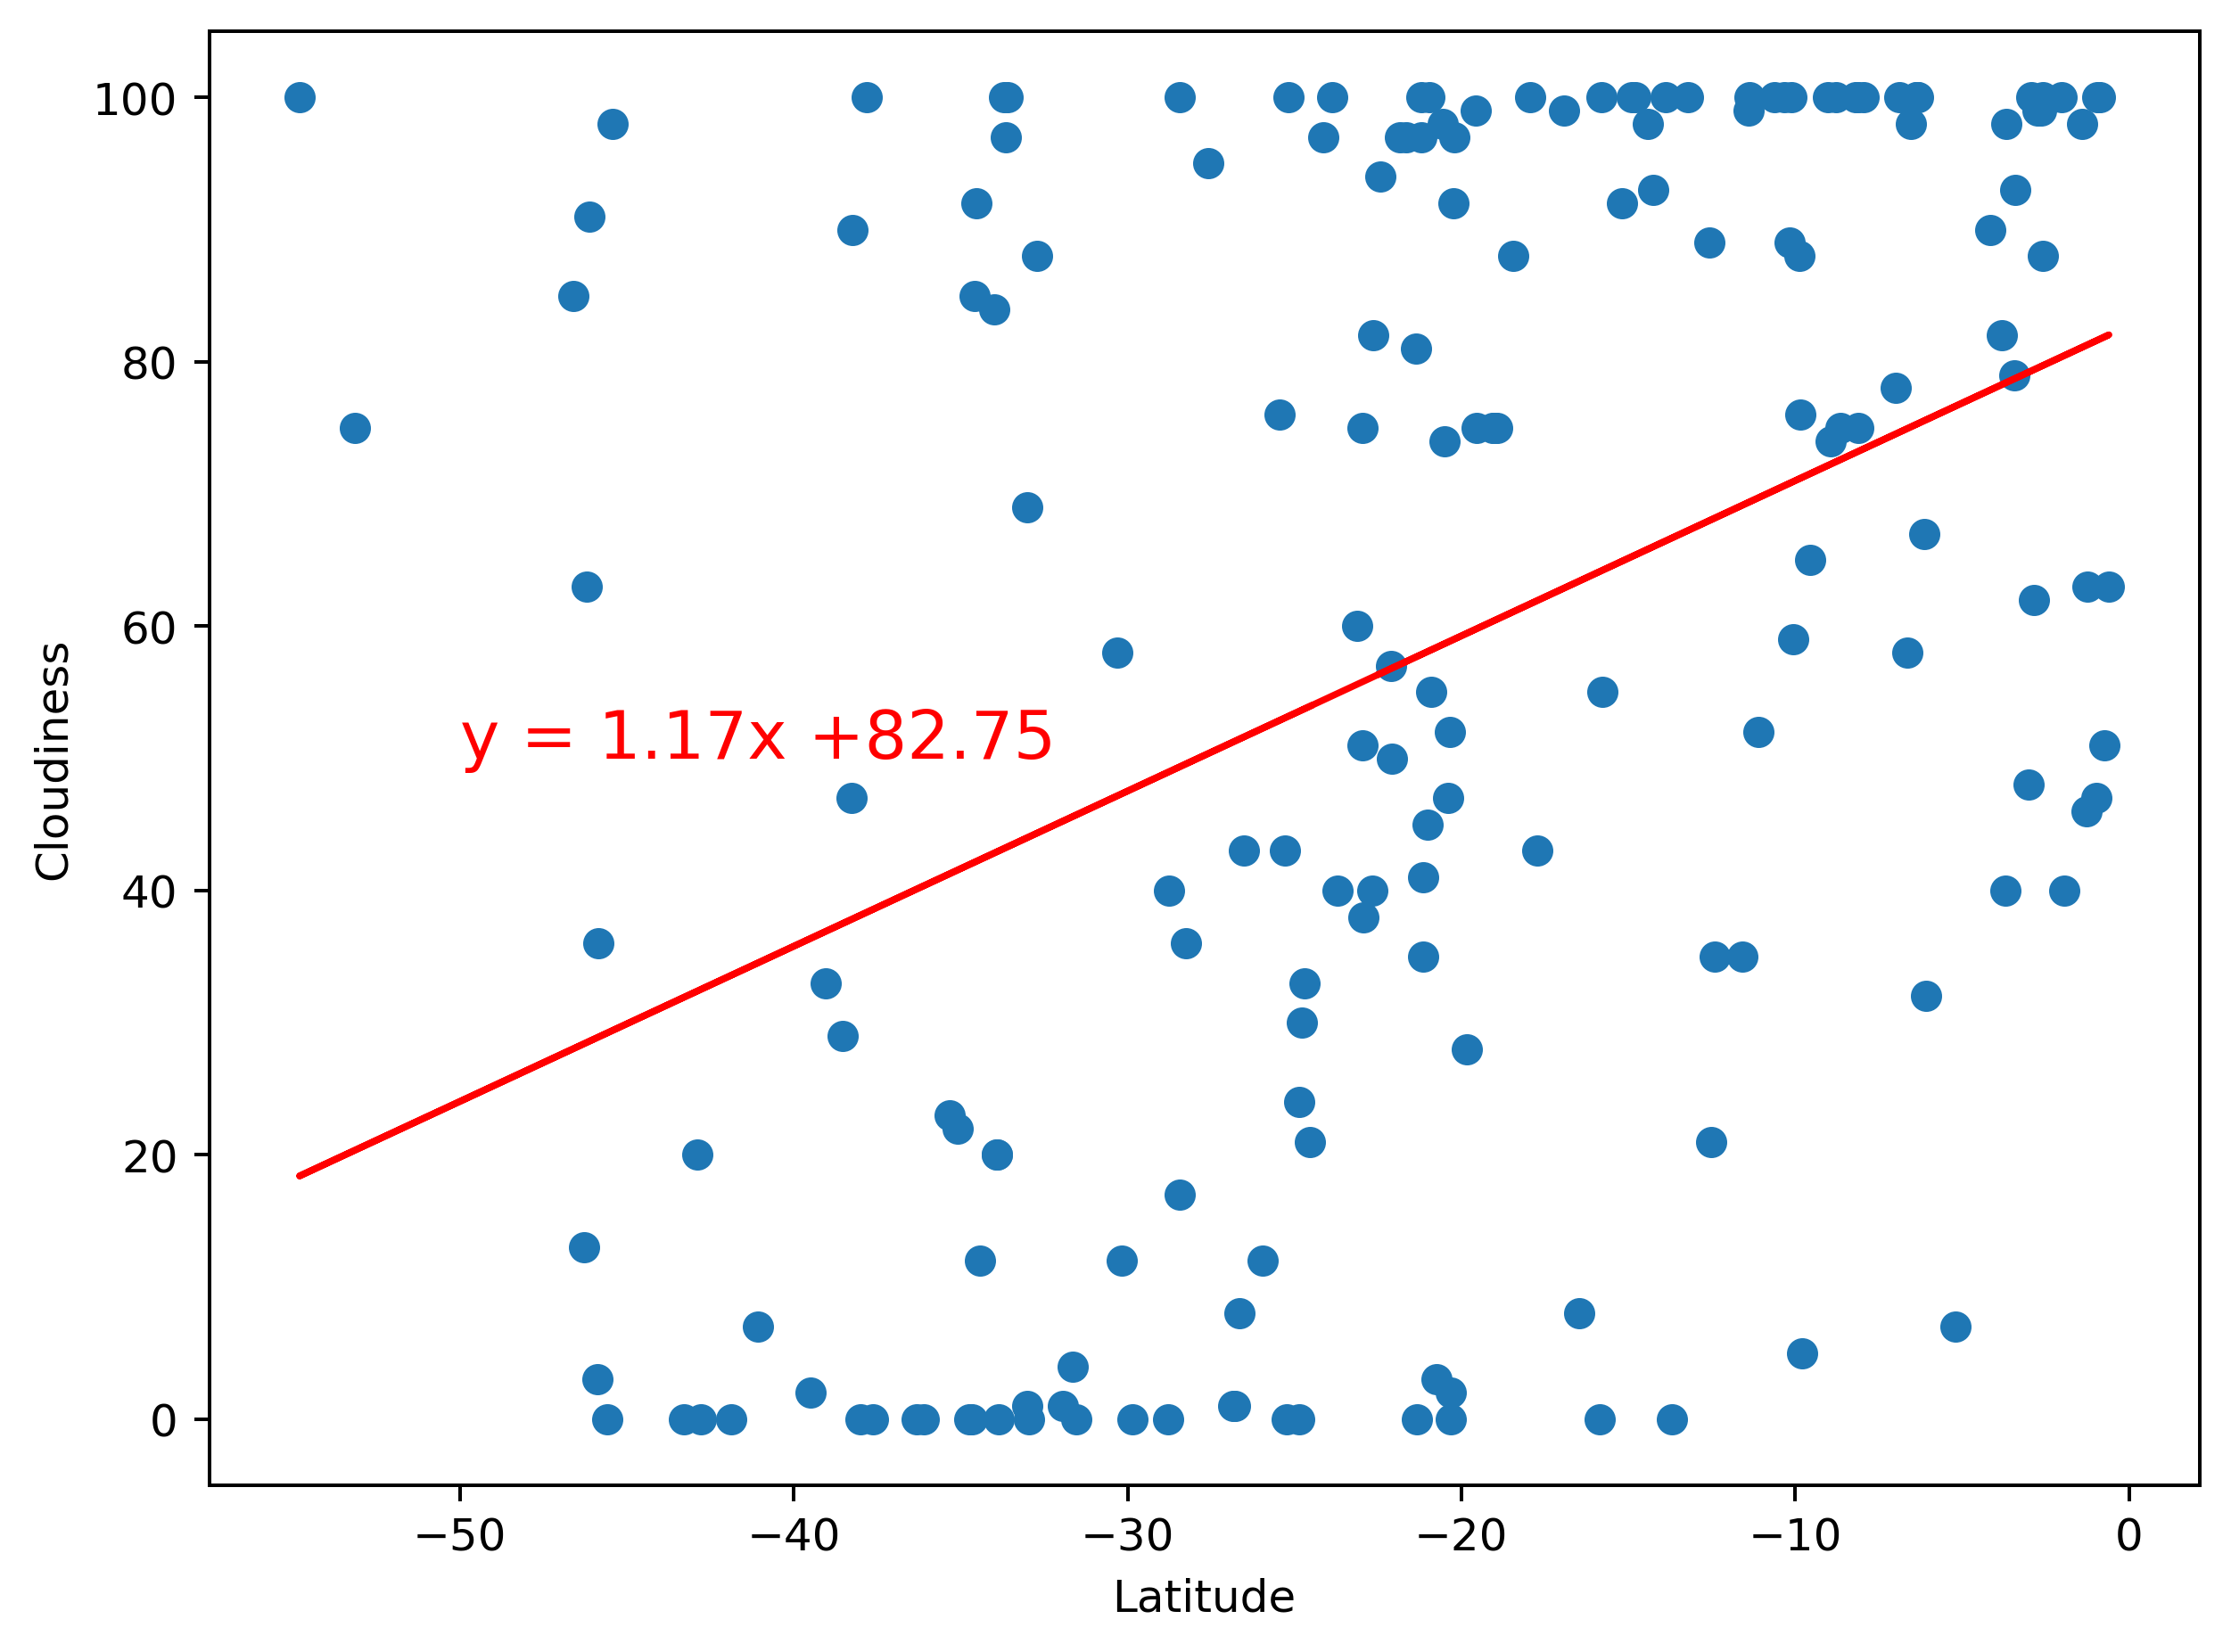

In [160]:
# Linear regression for Southern Hemisphere using defined function
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], -50, 50)

**Discussion about the linear relationship:**
- In both hemispheres the plots show a moderate positive correlation between latitude and cloudiness however the low r squared values indicate these models do not explain much of the variance in the data set. A linear relationship with latitude is not reliable to predict cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0008469933925949782


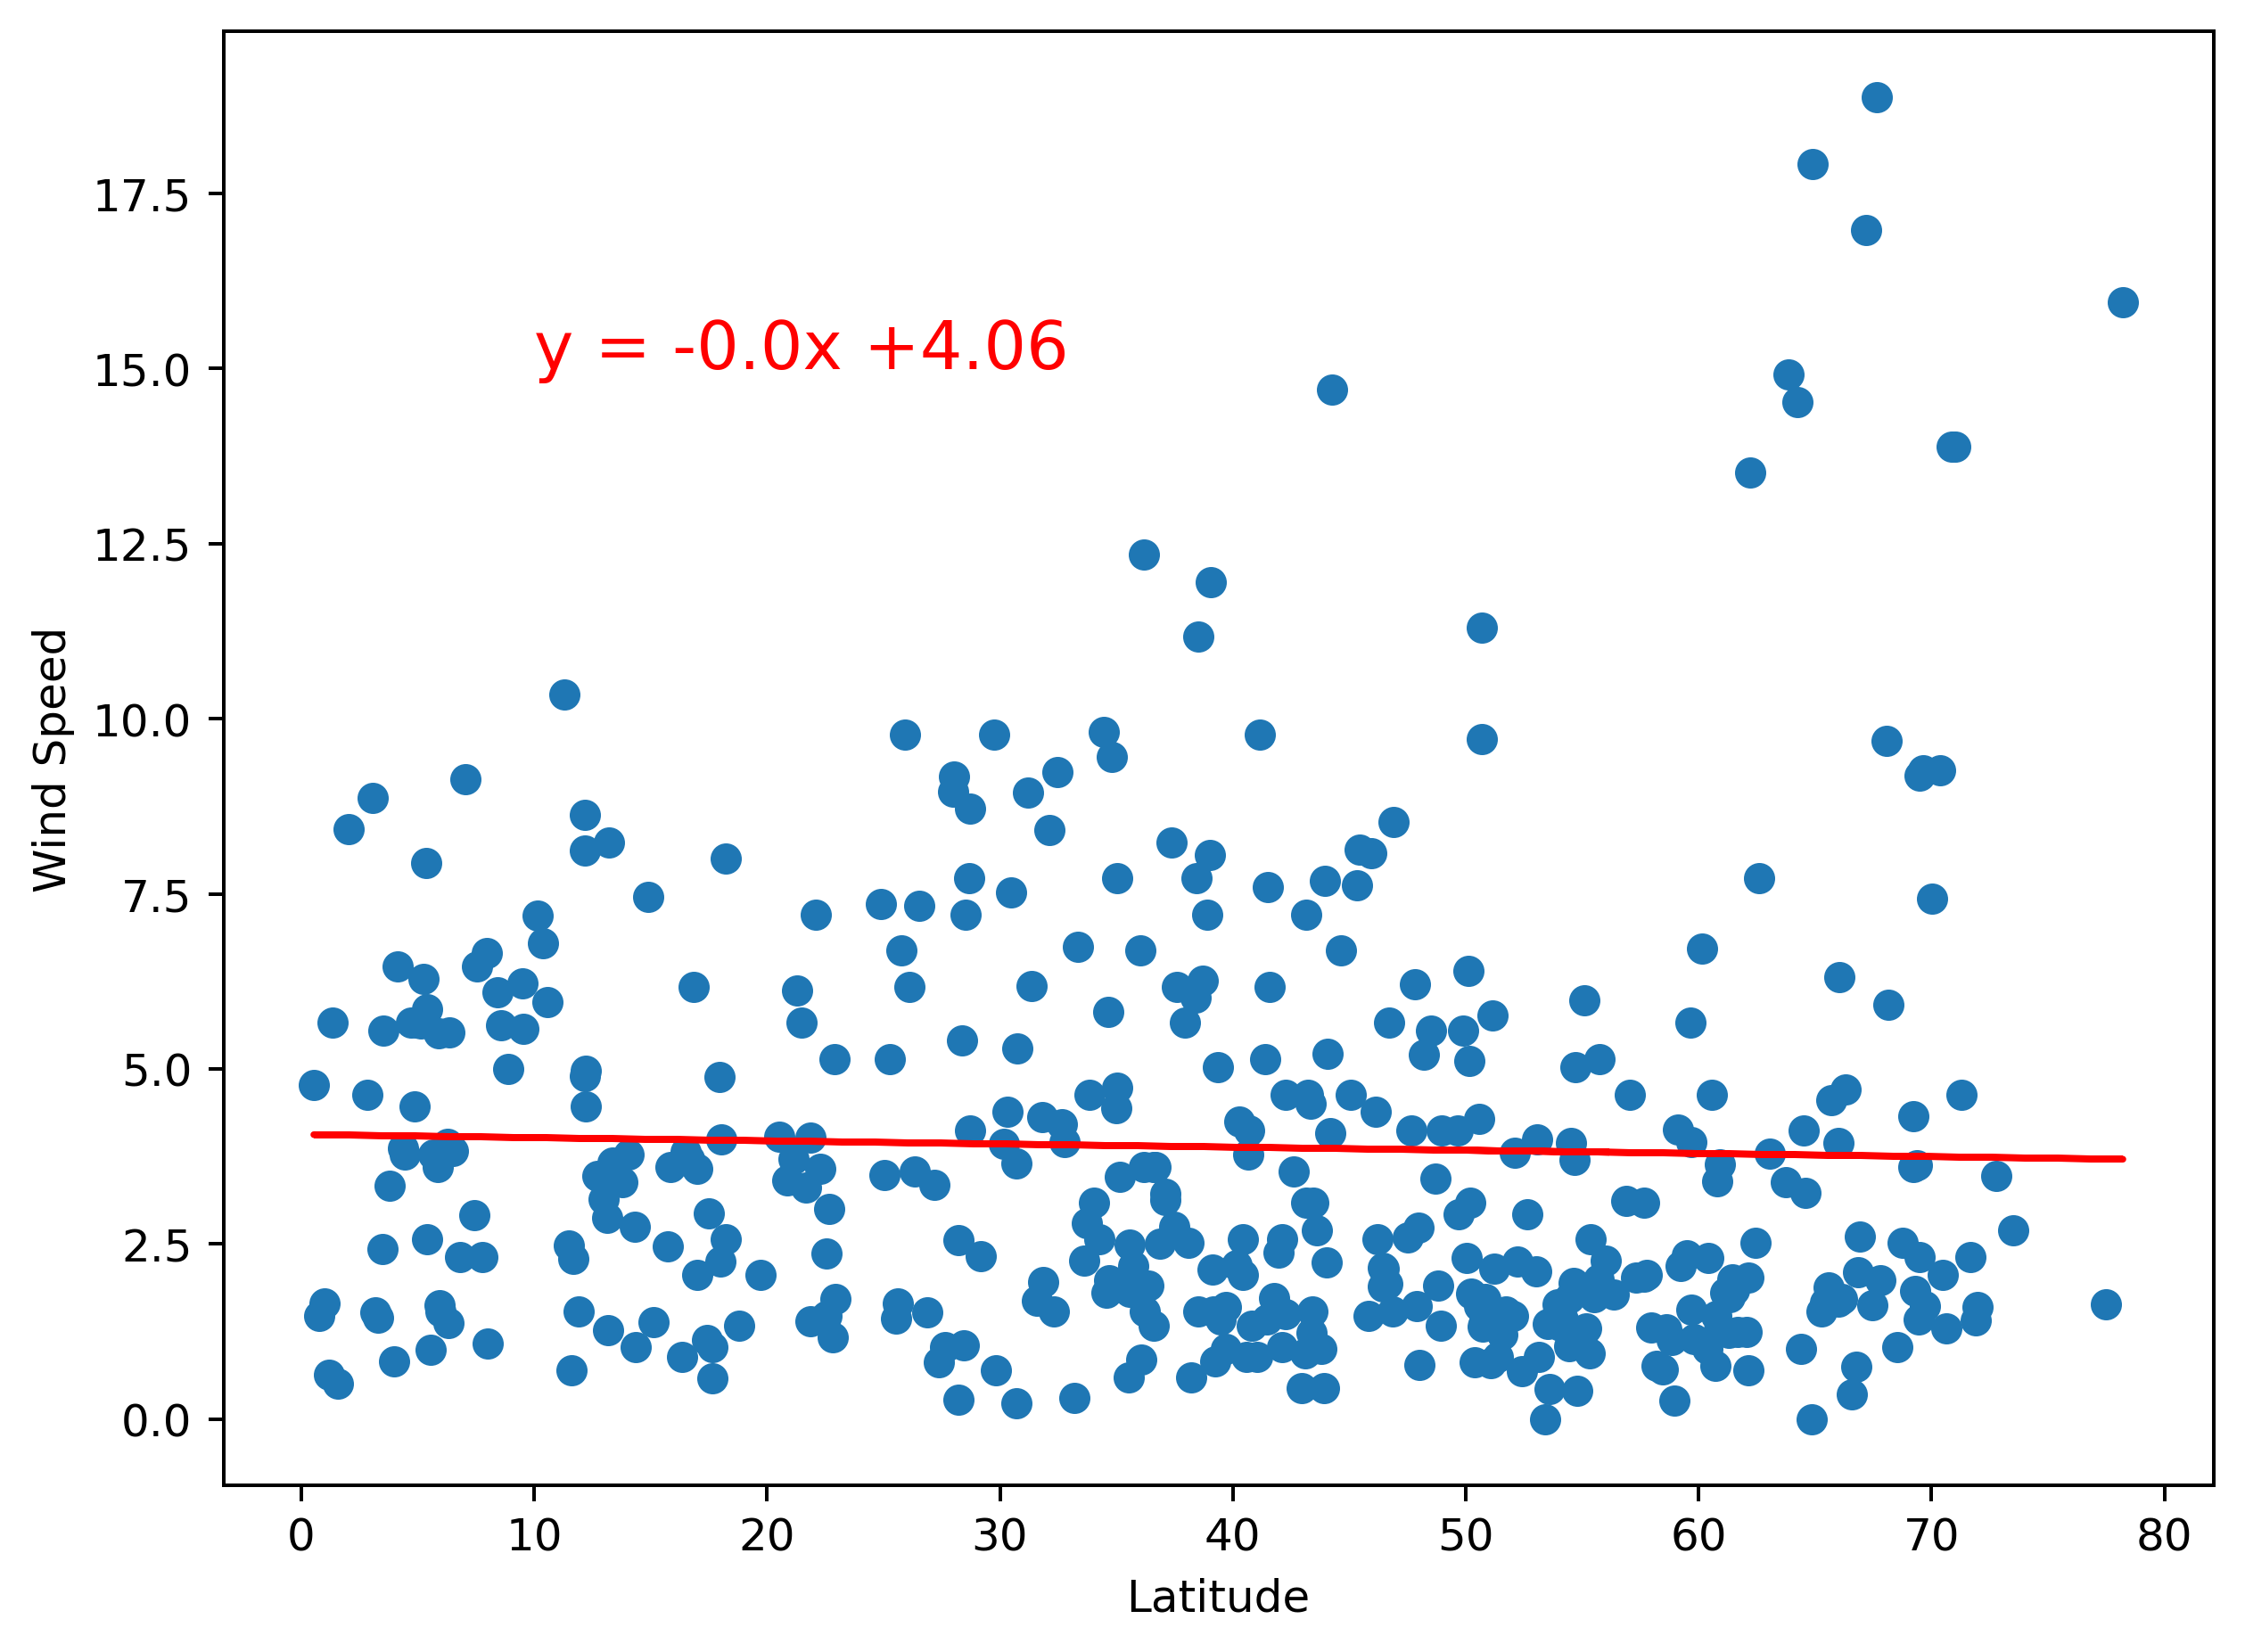

In [161]:
# Linear regression for Northern Hemisphere using defined function
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 10, 15)

The r-value is: 0.03814566753680046


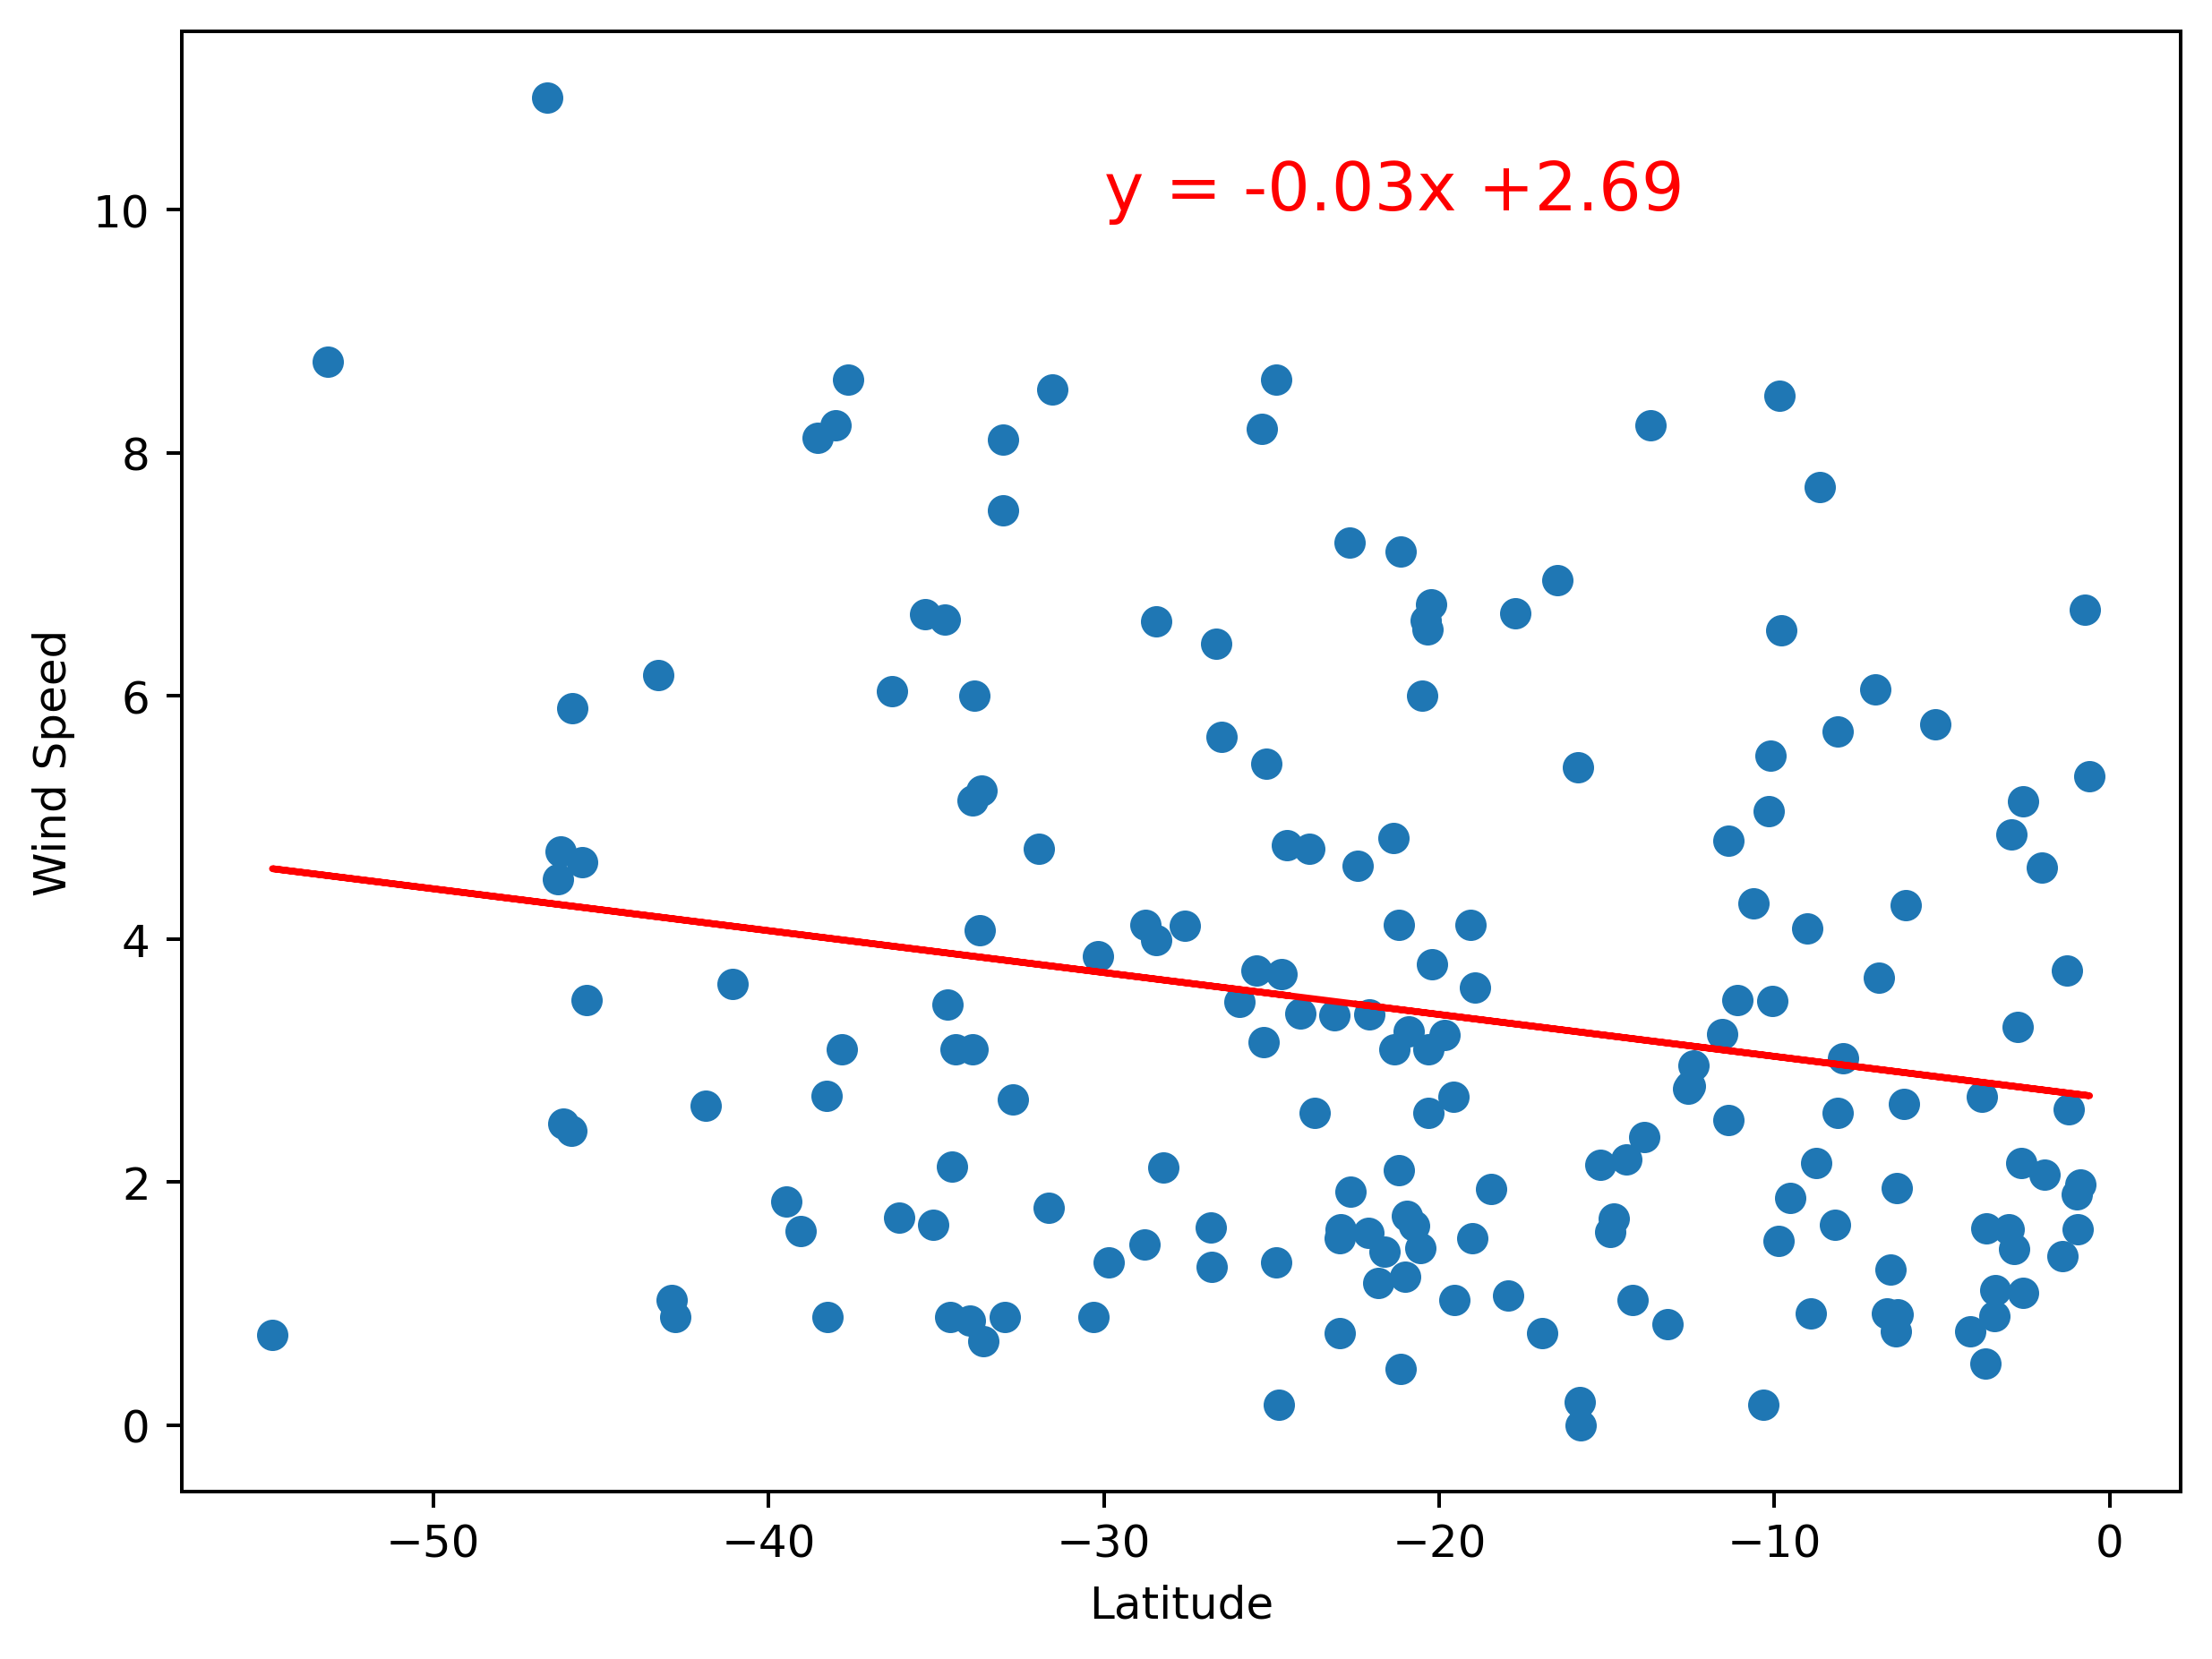

In [162]:
# Linear regression for Southern Hemisphere using defined function
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], -30, 10)

**Discussion about the linear relationship:** 
- The plots show a low negative correlation between latitude and wind speed in both hemispheres, particularly low in the northern hemisphere. However the r-squared values are very low, indicating a linear relationship with latitude does not explain much of the variability in wind speed if at all.